In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/PYTHON PROJECT.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data['pdays'] = (data['pdays'] != 999).astype(int)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1      0         0  nonexistent          1.1   
1   may         mon  ...         1      0         0  nonexistent          1.1   
2   may         mon  ...         1      0         0  nonexistent          1.1   
3   may         mon  ...         1      0         0  nonexistent          1.1   
4   may         mon  ...         1      0         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']
categorical_columns = ['job', 'marital', 'education', 'default',
                       'housing', 'loan', 'contact', 'month',
                       'day_of_week', 'poutcome', 'y']

# 1. Descriptive statistics
desc_stats = data[numerical_columns].describe()



desc_stats



age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593      0.036783      0.172963   
std       10.42125    259.279249      2.770014      0.188230      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000      0.000000      0.000000   
50%       38.00000    180.000000      2.000000      0.000000      0.000000   
75%       47.00000    319.000000      3.000000      0.000000      0.000000   
max       98.00000   4918.000000     56.000000      1.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000


The dataset provides information about customer demographics, campaign interactions, and macroeconomic indicators with 41,188 observations. Key patterns include:

**Demographics & Customer Interactions:**



*   The typical individual is 40 years old, with most calls lasting around 3-4 minutes (median: 180 seconds).
*  Most customers were contacted 1-3 times during the campaign, with some outliers contacted over 50 times.
*   For prior campaigns, the majority were not contacted before (median: 0), and for many, it had been 999 days (placeholder) since their last interaction.


**Campaign Distribution:**

*   Call durations vary significantly, with some very short or non-existent calls (min: 0) and a few outliers lasting up to 81 minutes.
*   Contacts during the campaign also exhibit a skew, with most individuals receiving relatively few follow-ups.

**Macroeconomic Context:**


*   The dataset shows some economic fluctuations, as seen by:
Employment variation rate ranging from -3.4 (economic downturn) to 1.4 (recovery).
*   A generally low consumer confidence index (mean: -40.5).
Interest rates (Euribor 3M) average 3.6%, with some periods as low as 0.6% and others as high as 5.0%, reflecting economic variability.

**Workforce Indicators:**


*   Employment levels are relatively stable, averaging around 5,167 employees, with slight fluctuations.


**Kritika's Summary**
The dataset is highly skewed in terms of call durations, campaign contacts, and days since last contact, suggesting the need for careful handling of outliers and placeholders during analysis. Economic indicators add valuable context, reflecting the external environment's potential influence on campaign effectiveness.



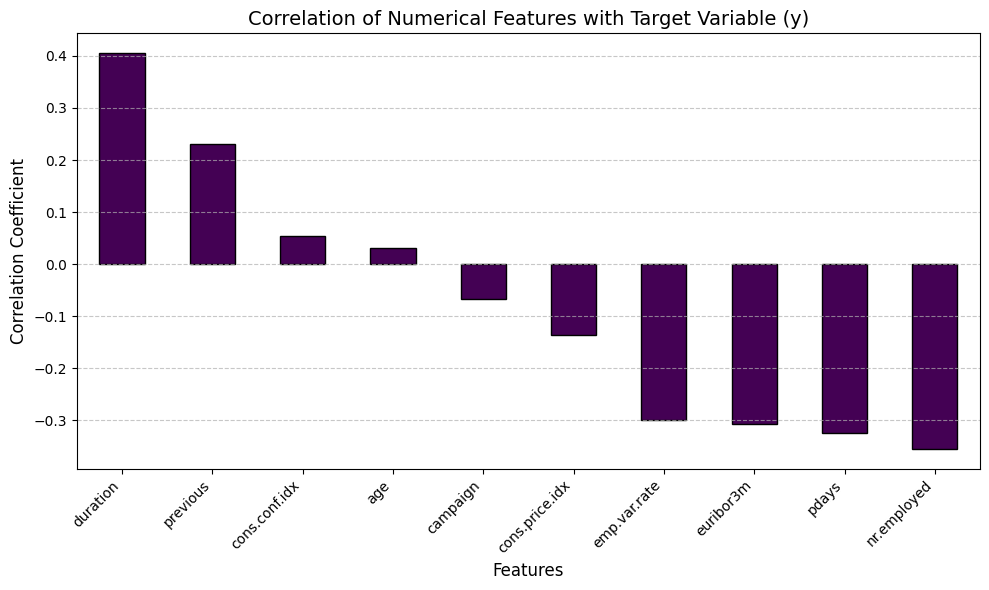

In [ ]:
# Encode the target variable 'y' as numeric (yes = 1, no = 0)
data['y_encoded'] = data['y'].map({'yes': 1, 'no': 0})

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical columns including 'y_encoded'
correlation_matrix = data[numerical_columns].corr()

# Extract correlation of numerical columns with 'y_encoded'
correlation_with_y = correlation_matrix['y_encoded'].drop('y_encoded')

# Plot correlation
plt.figure(figsize=(10, 6))
correlation_with_y.sort_values(ascending=False).plot(kind='bar', colormap='viridis', edgecolor='black')
plt.title('Correlation of Numerical Features with Target Variable (y)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
freq_percent_tables = {}

for col in categorical_columns:
    freq = data[col].value_counts()
    percent = (freq / len(data)) * 100
    freq_percent_tables[col] = pd.DataFrame({
        'Frequency': freq,
        'Percentage': percent
    })

combined_tables = pd.concat(freq_percent_tables, axis=0)
combined_tables.reset_index(inplace=True)
combined_tables.columns = ['Category', 'Value', 'Frequency', 'Percentage (%)']


combined_tables

Category                Value  Frequency  Percentage (%)
0           job               admin.      10422       25.303486
1           job          blue-collar       9254       22.467709
2           job           technician       6743       16.371273
3           job             services       3969        9.636302
4           job           management       2924        7.099155
5           job              retired       1720        4.175974
6           job         entrepreneur       1456        3.535010
7           job        self-employed       1421        3.450034
8           job            housemaid       1060        2.573565
9           job           unemployed       1014        2.461882
10          job              student        875        2.124405
11          job              unknown        330        0.801204
12      marital              married      24928       60.522482
13      marital               single      11568       28.085850
14      marital             divorced       4612       11.197436
15      marital              unknown         80        0.194231
16    education    university.degree      12168       29.542585
17    education          high.school       9515       23.101389
18    education             basic.9y       6045       14.676605
19    education  professional.course       5243       12.729436
20    education             basic.4y       4176       10.138875
21    education             basic.6y       2292        5.564728
22    education              unknown       1731        4.202680
23    education           illiterate         18        0.043702
24      default                   no      32588       79.120132
25      default              unknown       8597       20.872584
26      default                  yes          3        0.007284
27      housing                  yes      21576       52.384190
28      housing                   no      18622       45.212198
29      housing              unknown        990        2.403613
30         loan                   no      33950       82.426920
31         loan                  yes       6248       15.169467
32         loan              unknown        990        2.403613
33      contact             cellular      26144       63.474798
34      contact            telephone      15044       36.525202
35        month                  may      13769       33.429640
36        month                  jul       7174       17.417694
37        month                  aug       6178       14.999514
38        month                  jun       5318       12.911528
39        month                  nov       4101        9.956784
40        month                  apr       2632        6.390211
41        month                  oct        718        1.743226
42        month                  sep        570        1.383898
43        month                  mar        546        1.325629
44        month                  dec        182        0.441876
45  day_of_week                  thu       8623       20.935709
46  day_of_week                  mon       8514       20.671069
47  day_of_week                  wed       8134       19.748470
48  day_of_week                  tue       8090       19.641643
49  day_of_week                  fri       7827       19.003108
50     poutcome          nonexistent      35563       86.343110
51     poutcome              failure       4252       10.323395
52     poutcome              success       1373        3.333495
53            y                   no      36548       88.734583
54            y                  yes       4640       11.265417


*   The dataset is skewed toward individuals who are **married (60.52%) **and employed in roles such as **Admin. (25.30%) or Blue-collar (22.47%**). These dominant groups are key to campaign success but may indicate an underrepresentation of other demographic segments.
*   A significant proportion of customers **(52.38%) have housing loans**, potentially signaling financial commitments that could influence their responsiveness to campaigns.
*   The majority of contacts **(63.47%) are made through cellular phones**, with efforts concentrated in *May (33.43%)*. However, lower contact frequencies in other months (e.g., December and March) suggest opportunities to diversify the timing and channels of engagement.
*   Calls are fairly distributed across weekdays, with a slight preference for **Thursdays and Mondays**.
*  ** Most customers (88.73%) did not subscribe** , indicating a low campaign success rate of 11.27%. This highlights the need to refine targeting strategies and improve engagement effectiveness.
*  ** Previous campaigns were largely ineffective, with 86.34% **of customers having no prior interaction and only 3.33% showing a successful outcome. This underscores limited historical traction.



<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



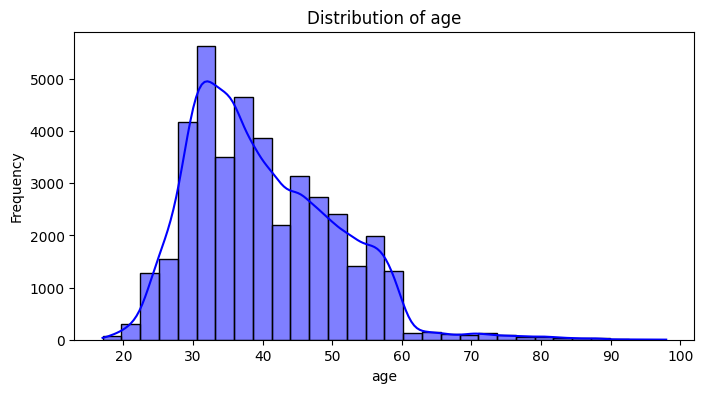

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



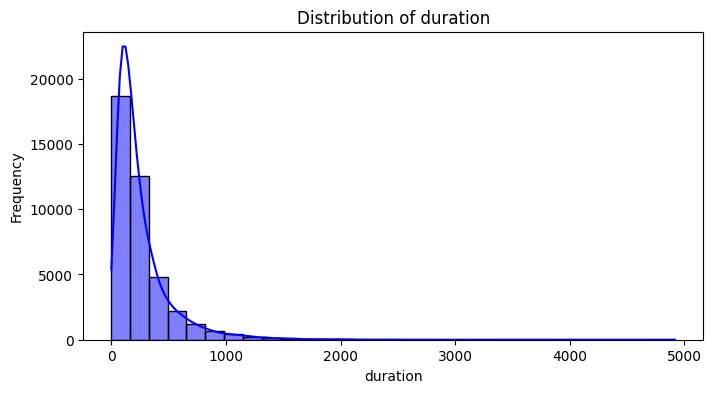

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



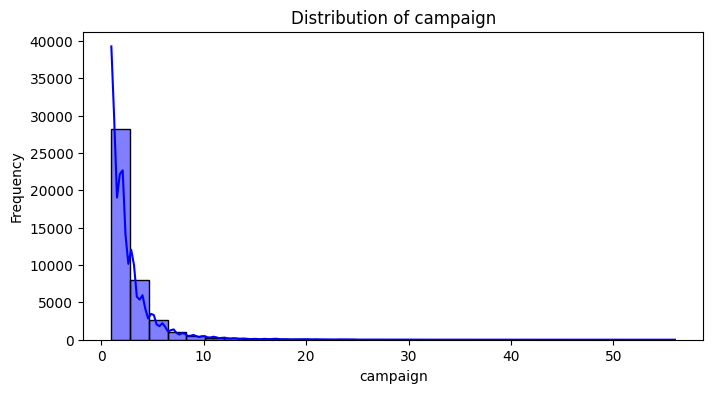

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



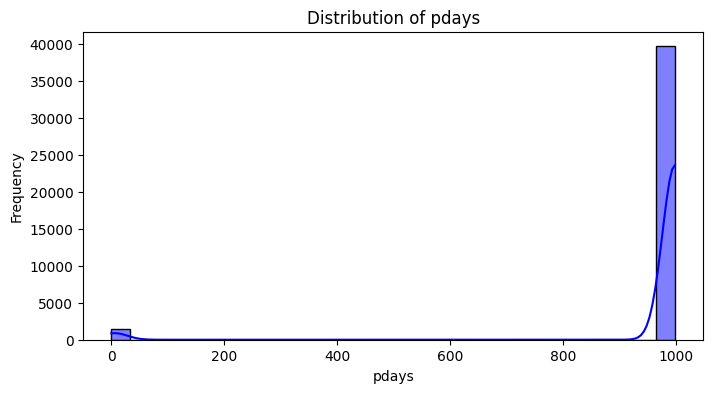

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



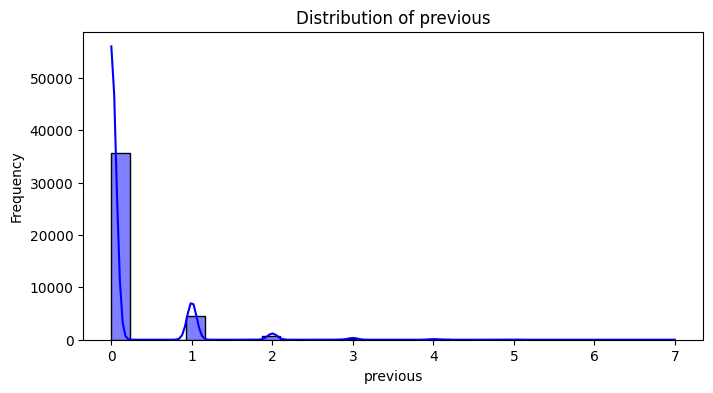

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



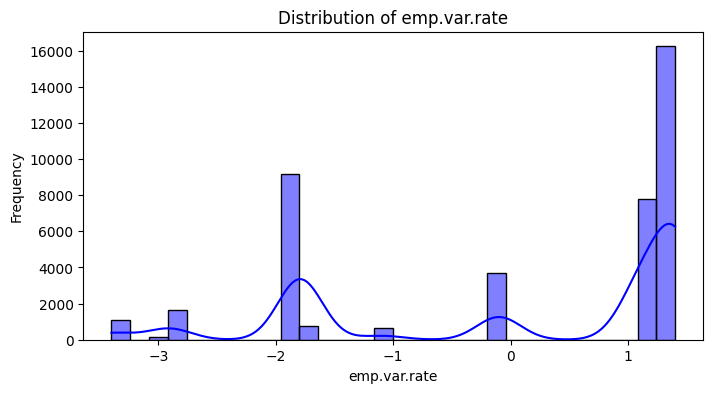

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



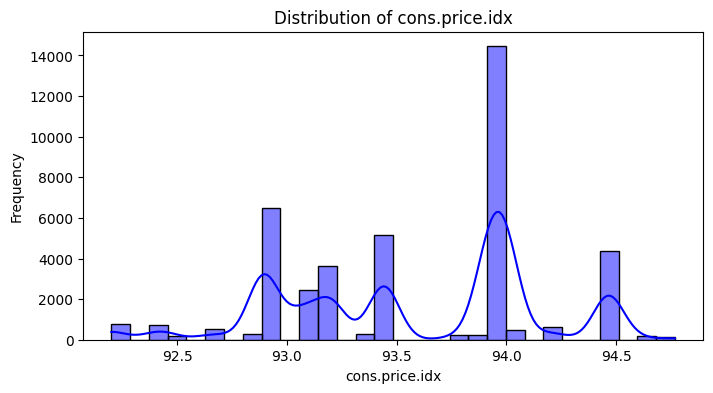

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



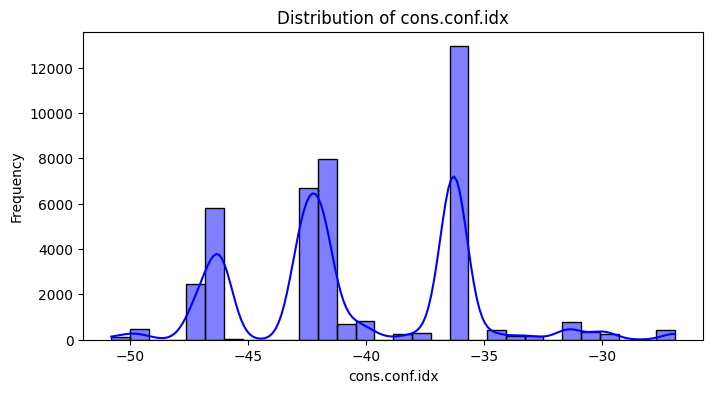

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



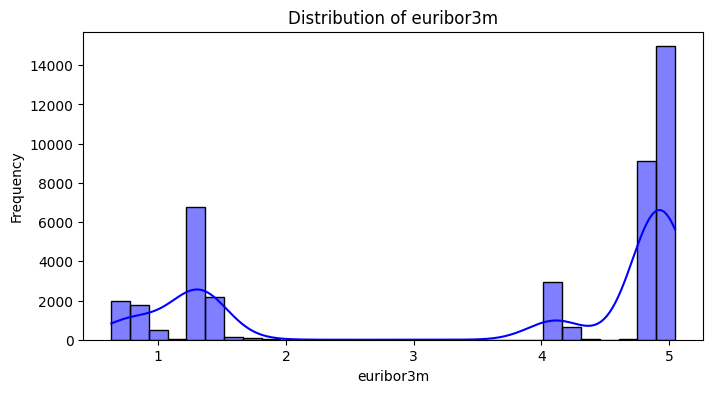

<ipython-input-255-95c9f89b752b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



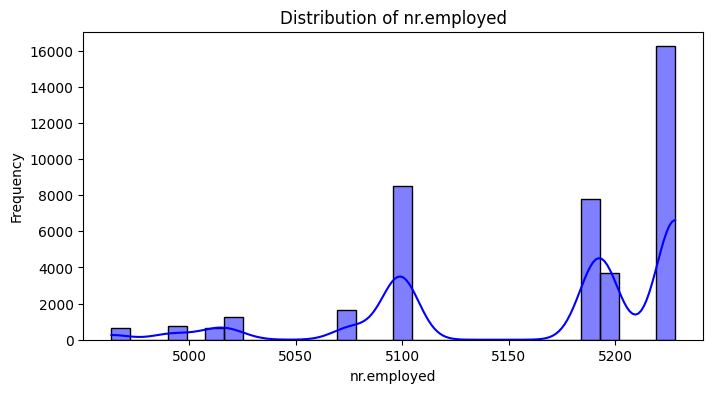

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




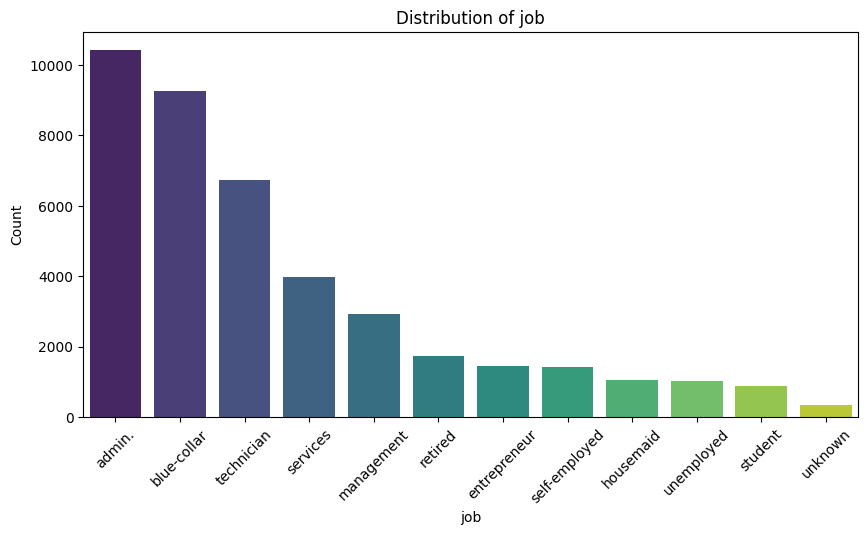

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




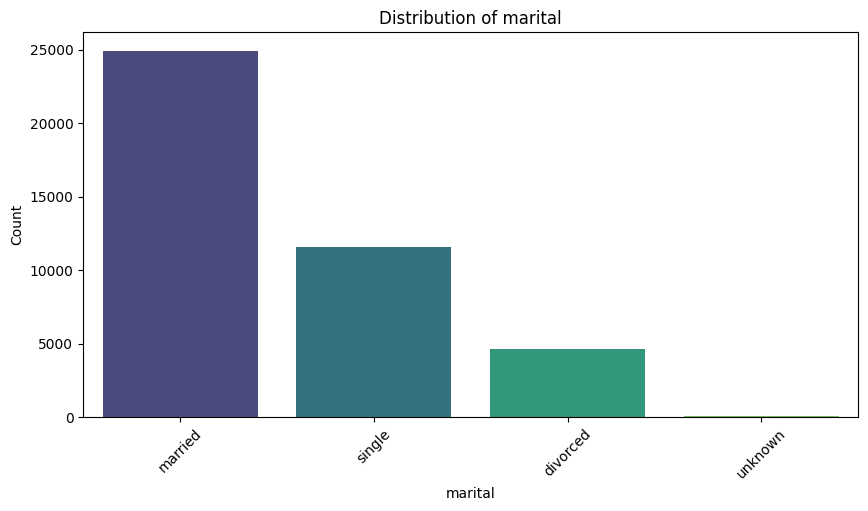

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




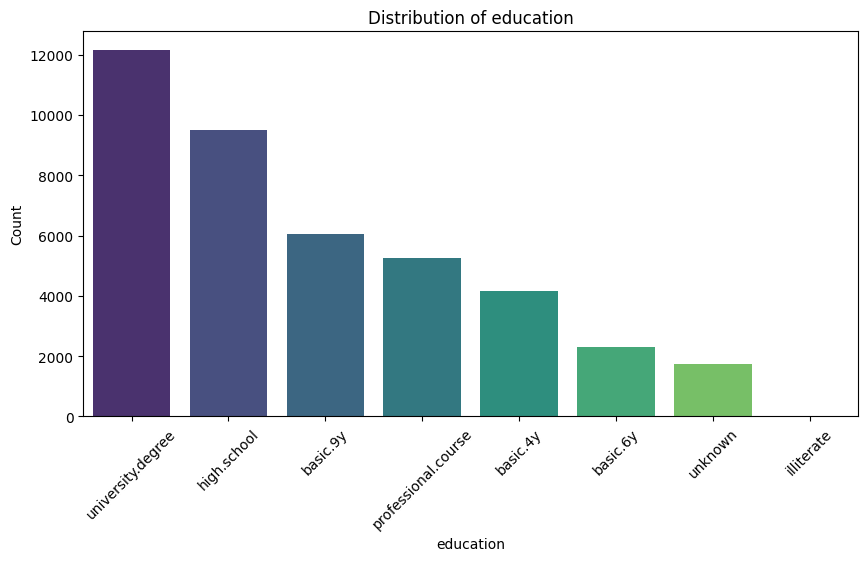

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




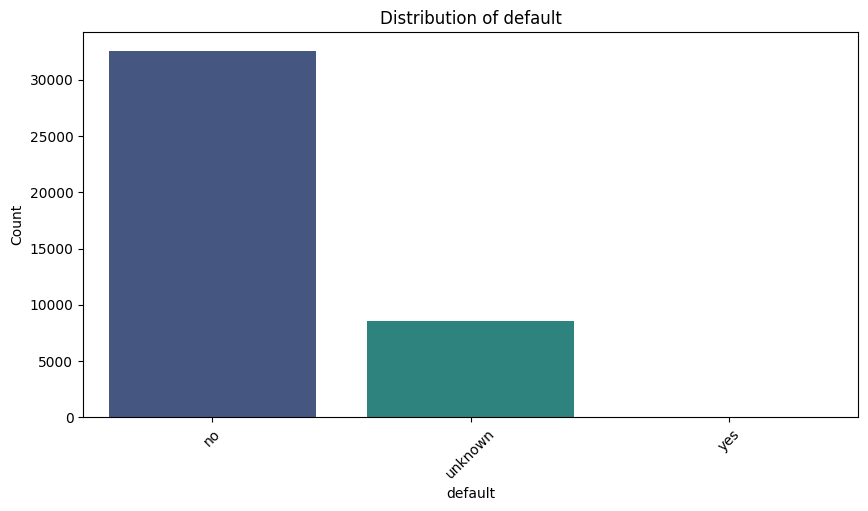

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




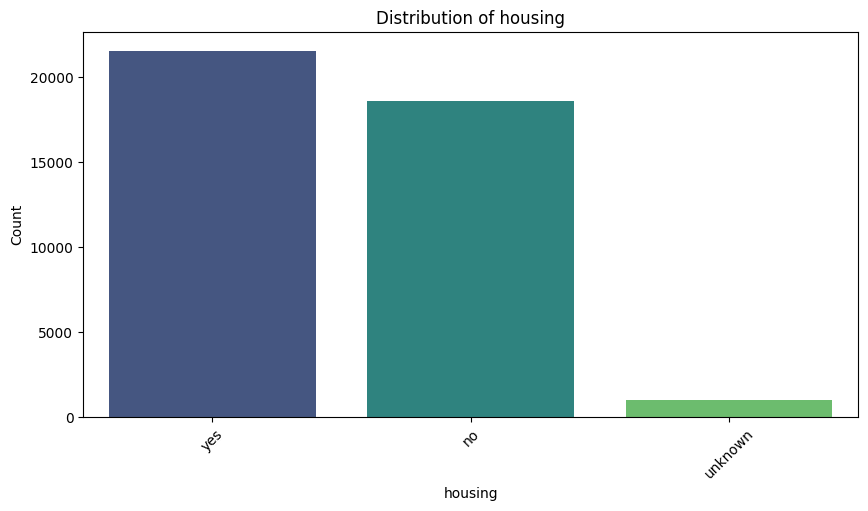

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




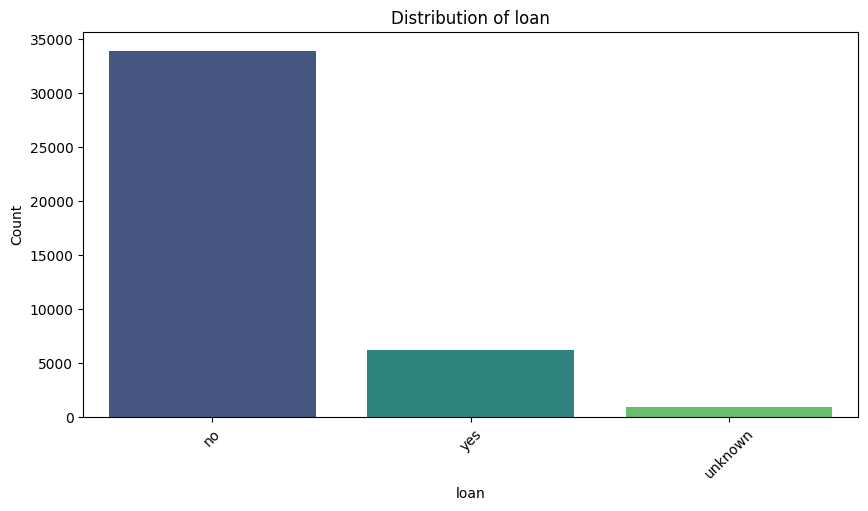

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




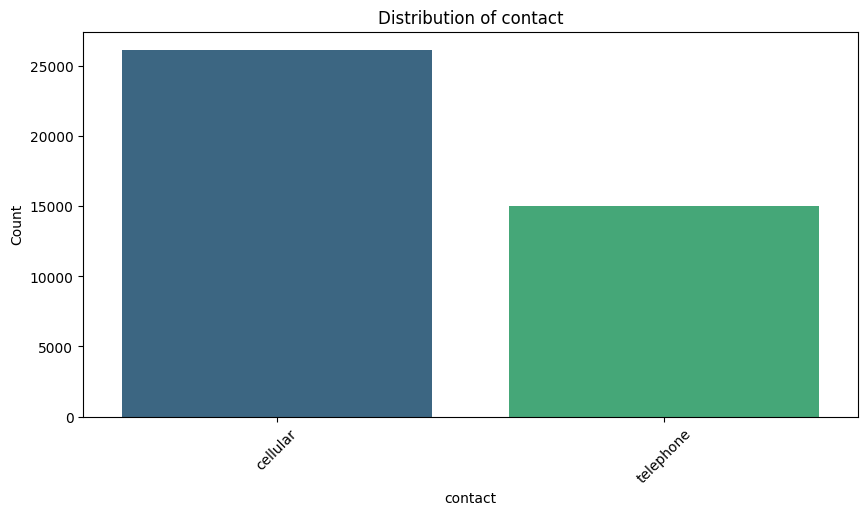

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




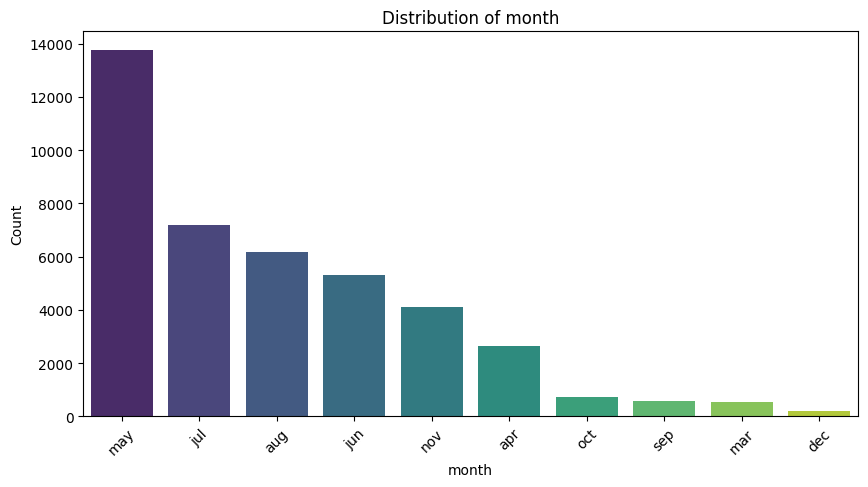

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




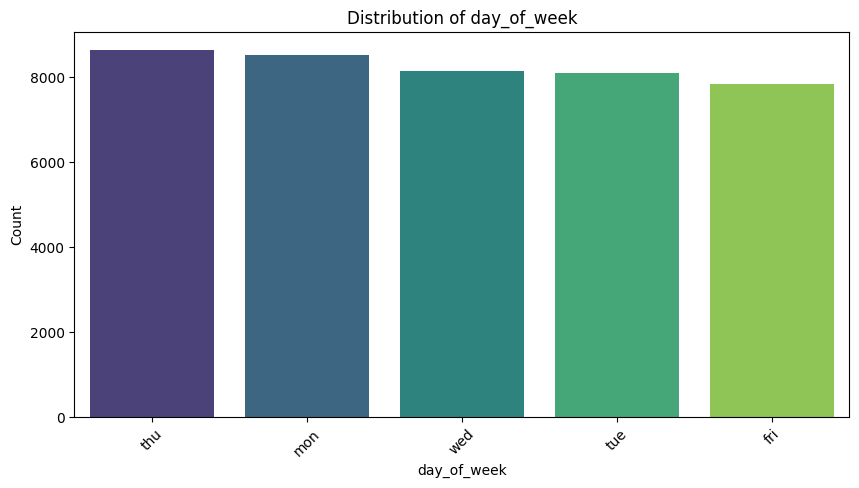

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




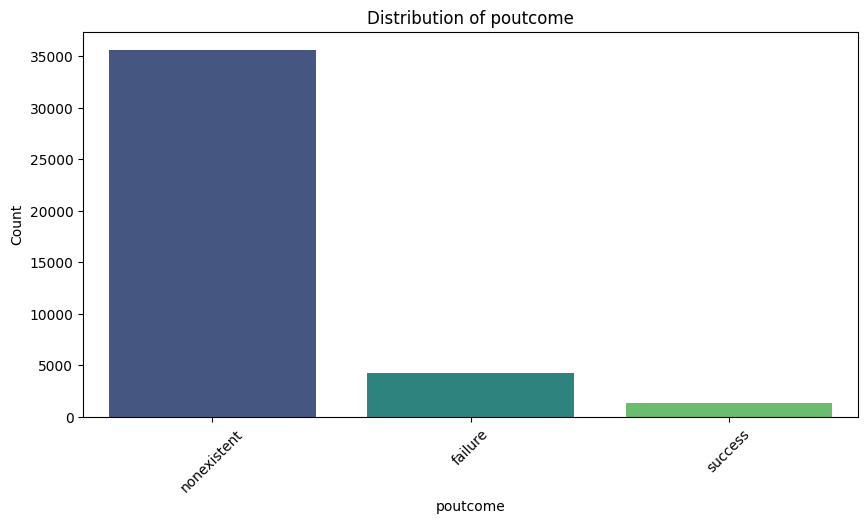

<ipython-input-255-95c9f89b752b>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




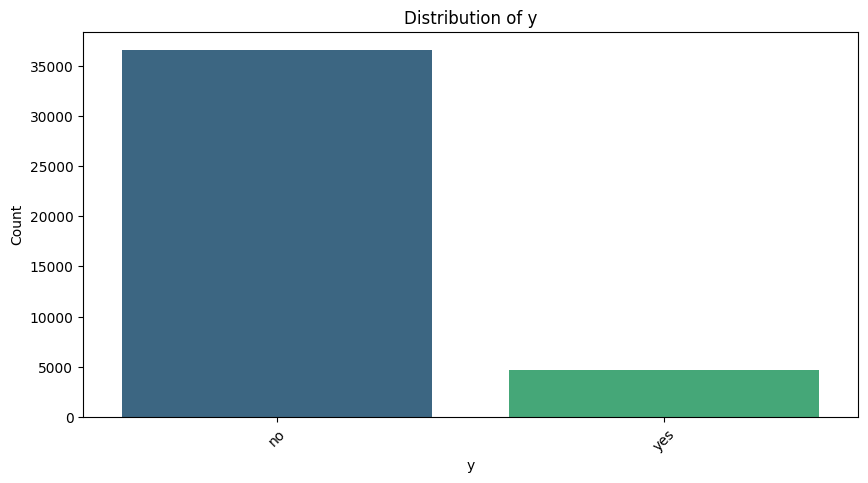

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




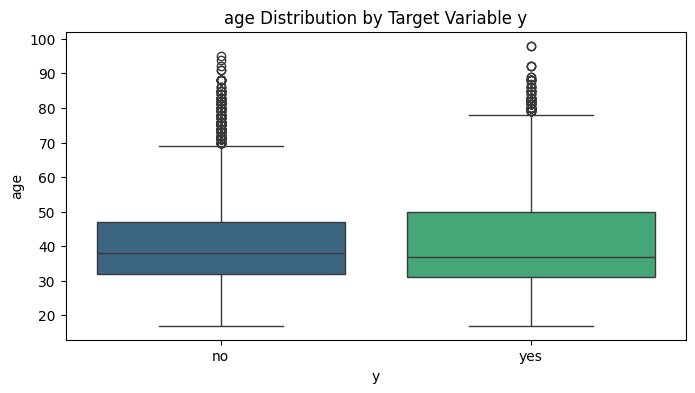

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




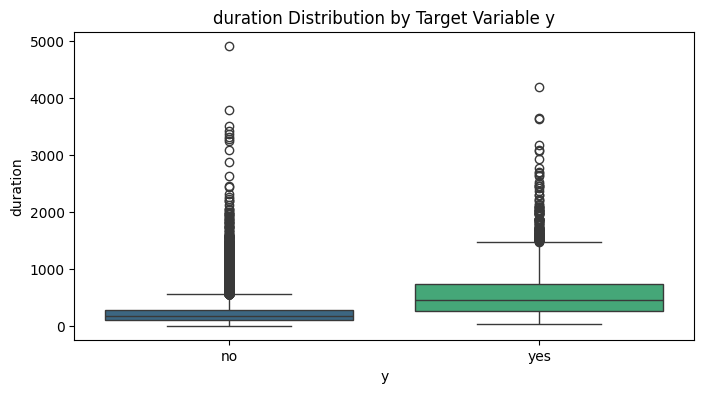

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




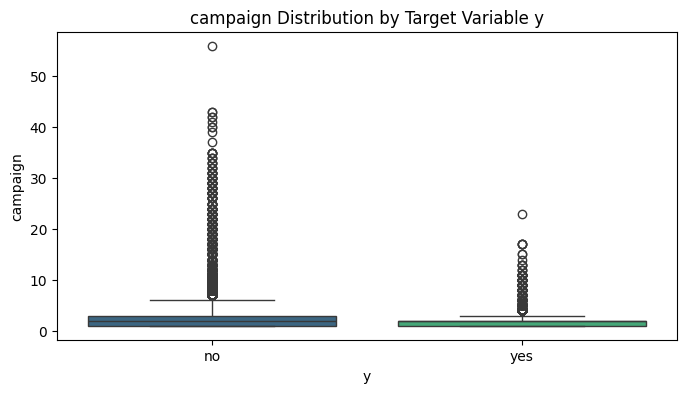

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




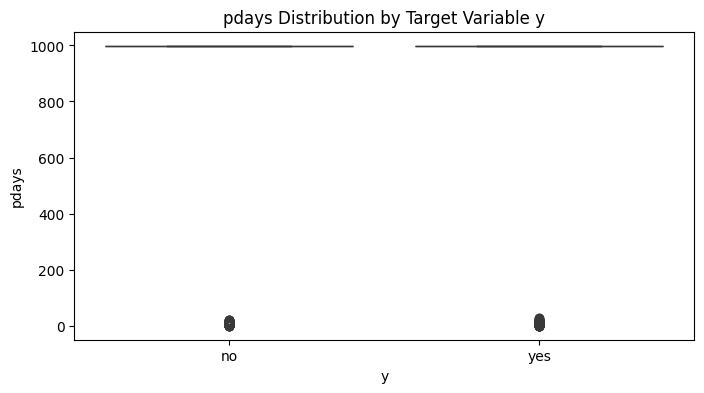

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




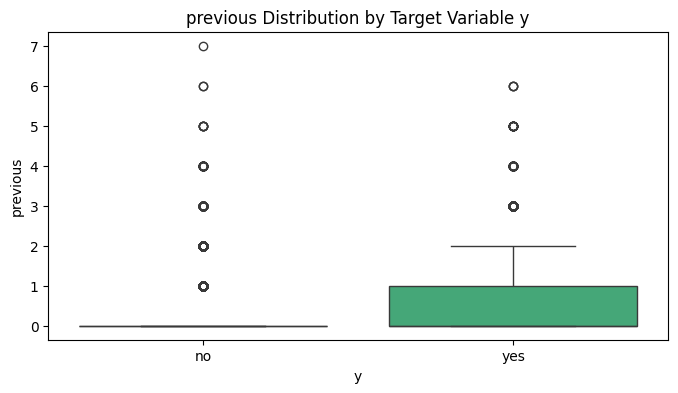

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




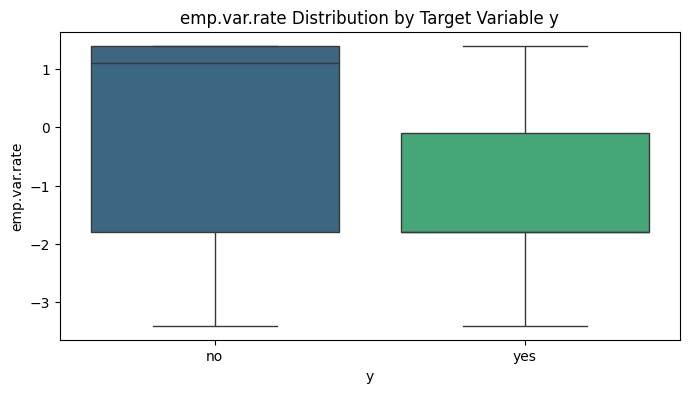

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




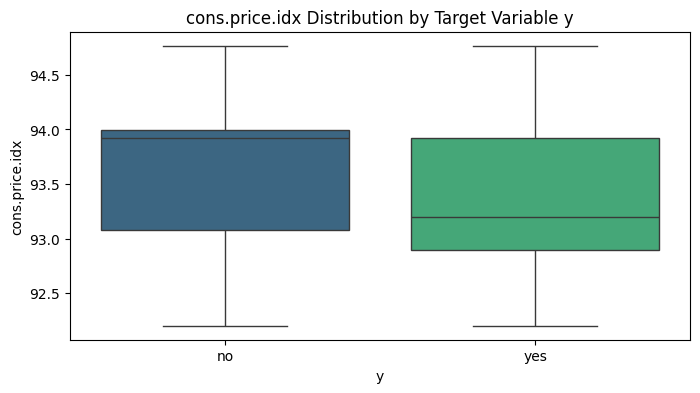

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




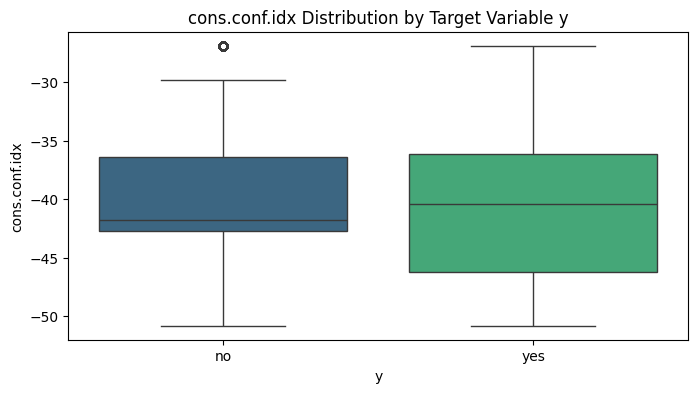

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




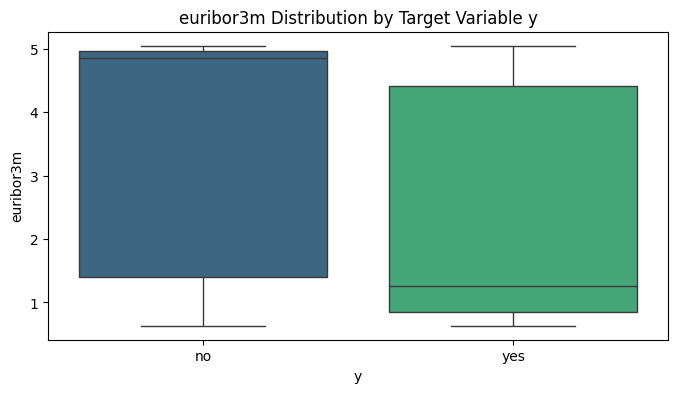

<ipython-input-255-95c9f89b752b>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




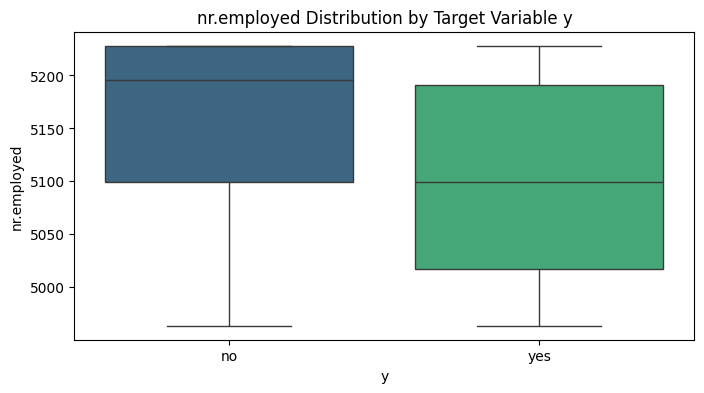

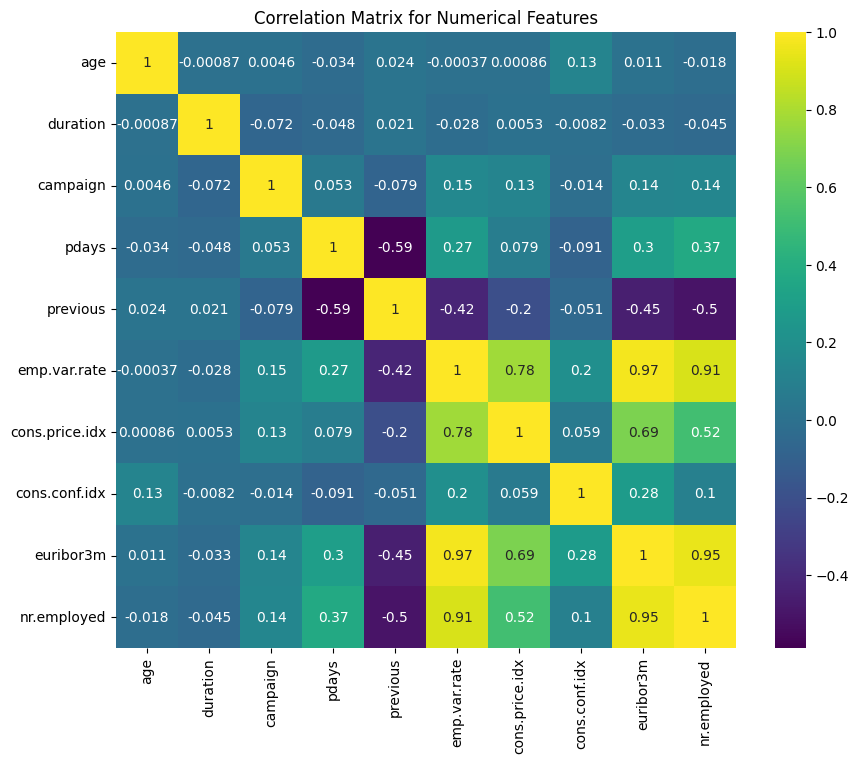

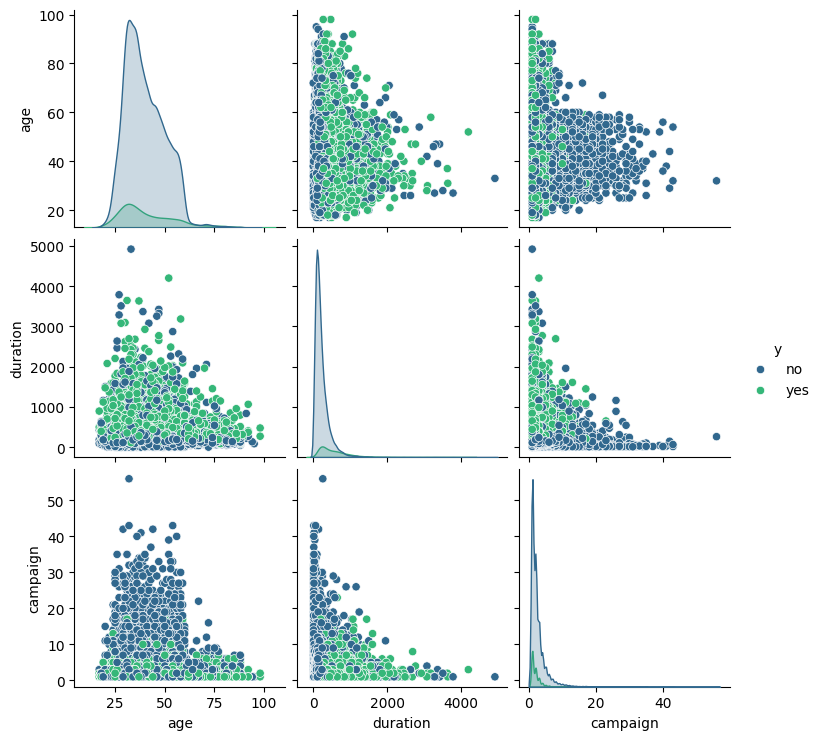

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




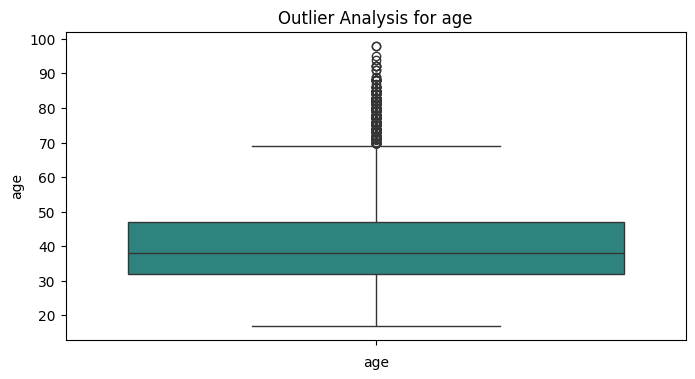

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




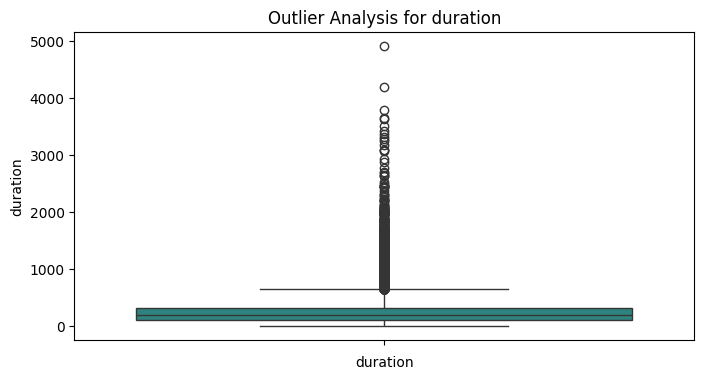

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




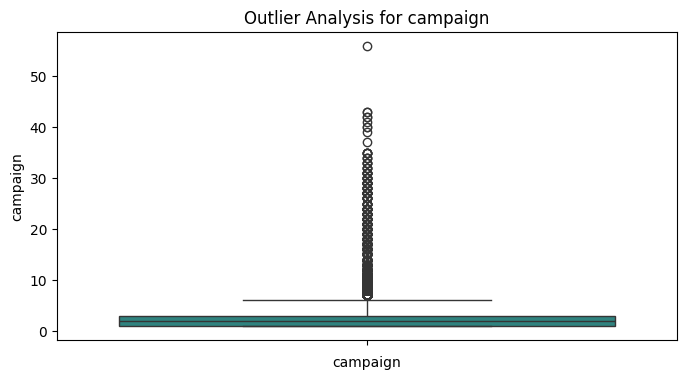

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




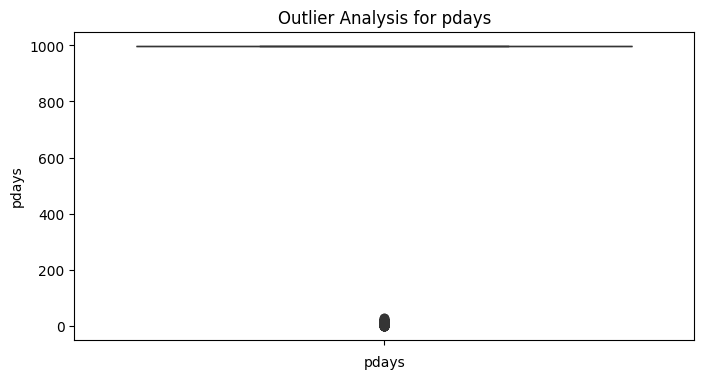

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




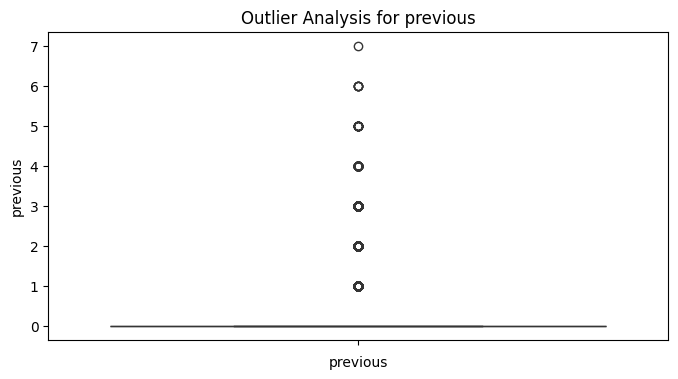

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




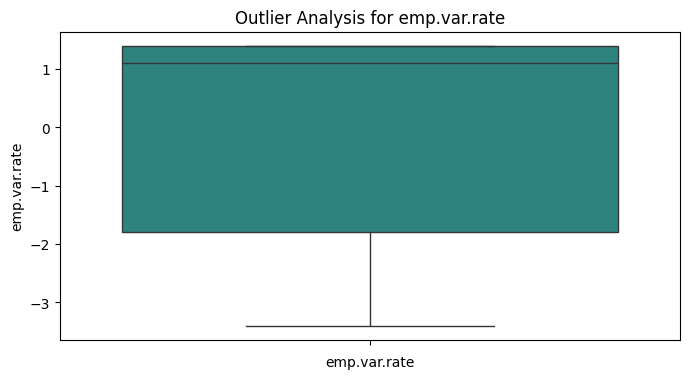

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




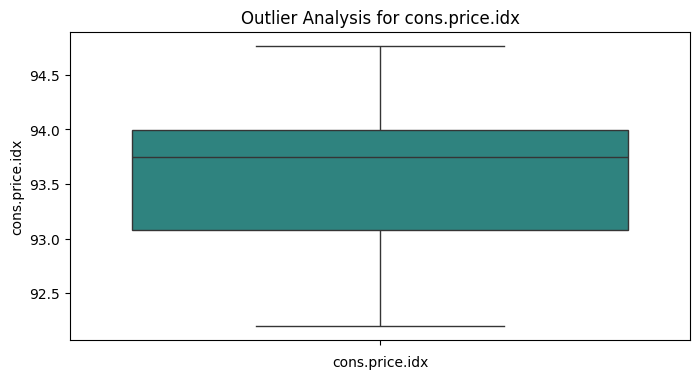

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




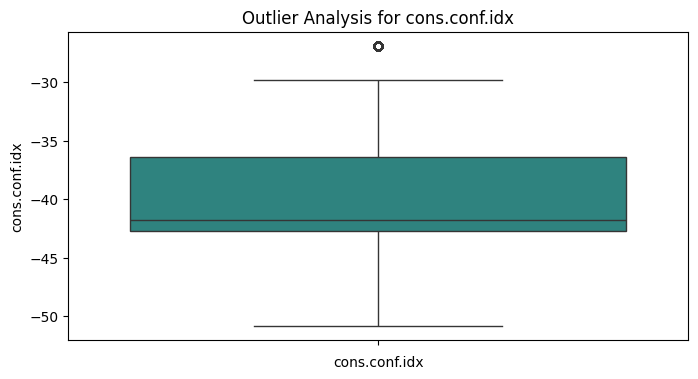

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




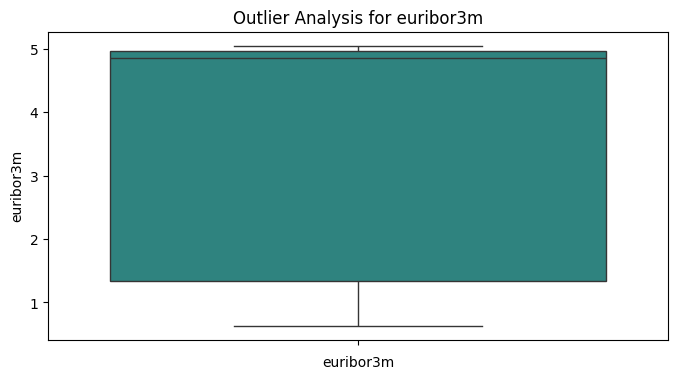

<ipython-input-255-95c9f89b752b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




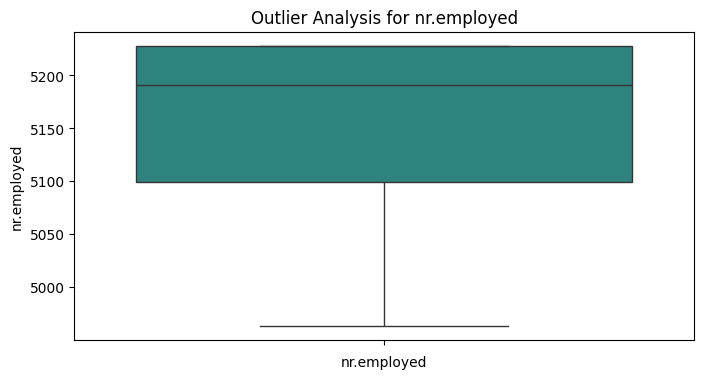

In [ ]:
# Plot distribution for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue', palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot count distribution for categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Compare numerical variables across target variable
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='y', y=col, palette='viridis')
    plt.title(f'{col} Distribution by Target Variable y')
    plt.xlabel('y')
    plt.ylabel(col)
    plt.show()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix for Numerical Features')
plt.show()
# Pairplot for selected numerical features and target
selected_features = ['age', 'duration', 'campaign', 'y']
sns.pairplot(data[selected_features], hue='y', palette='viridis')
plt.show()

# Plot boxplots for outlier detection in numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data[col], palette='viridis')
    plt.title(f'Outlier Analysis for {col}')
    plt.xlabel(col)
    plt.show()




**Age Distribution:**

The age distribution shows a peak between 30 and 40 years, with a sharp decline for individuals above 50. This indicates that the campaign is primarily targeted at middle-aged individuals.

**Call Duration Distribution:**

Most calls are concentrated below 500 seconds (8 minutes), with a long tail extending up to 5,000 seconds (~83 minutes). This suggests that while most calls are brief, a few outliers account for significantly longer calls.

**Campaign Contact Frequency:**

The distribution of campaign contacts is highly skewed, with the majority of customers contacted only 1-3 times. Few customers were contacted excessively (over 50 times), which may indicate inefficiencies or potential customer fatigue.

**Days Since Last Contact (Pdays):**

A large spike at 999 days indicates that most customers were not contacted in the prior campaign, likely using 999 as a placeholder value. This shows a lack of follow-up for the majority of customers.

**Education and Default Distributions:**


The majority of customers have university degrees or high school education, highlighting an educated target audience.
Very few individuals have defaulted on loans, but a significant portion (~21%) has an unknown default status, which may affect credit-based decision-making or targeting.

<ipython-input-207-761f94703f9a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




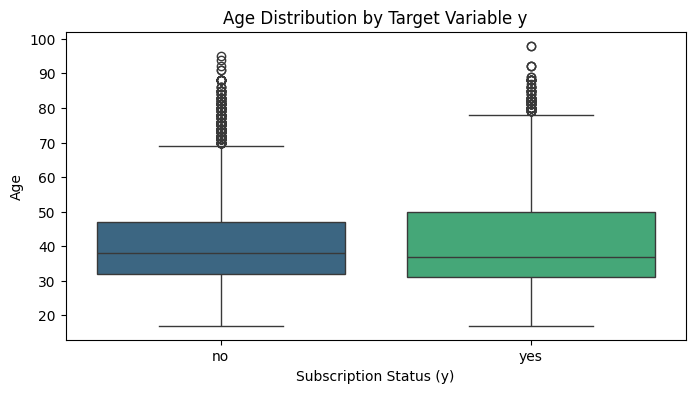

In [ ]:
# Boxplot for 'Age' distribution by the target variable 'y'
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='y', y='age', palette='viridis')
plt.title('Age Distribution by Target Variable y')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Age')
plt.show()

There is significant overlap in the age distribution between the two groups, indicating that age alone might not be a decisive factor in determining subscription likelihood.

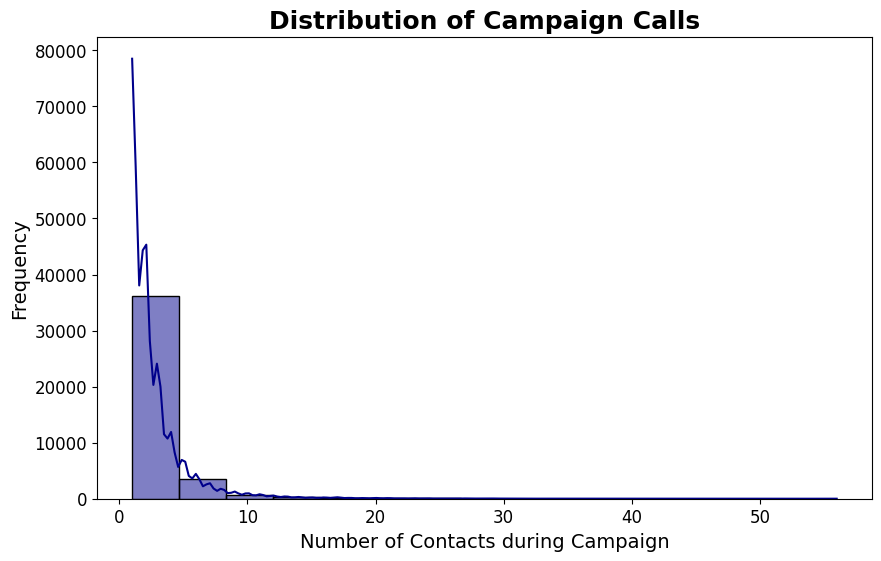

In [ ]:
# Histogram for 'campaign' distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['campaign'], bins=15, kde=True, color='darkblue', edgecolor='black')
plt.title('Distribution of Campaign Calls', fontsize=18, weight='bold')
plt.xlabel('Number of Contacts during Campaign', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Distribution of Calls**



In [ ]:
import plotly.express as px


custom_color_map = {'yes': px.colors.sequential.Viridis[0], 'no': px.colors.sequential.Viridis[3]}

violin_fig = px.violin(
    data,
    y='duration',
    x='y',
    box=True,
    points='all',
    title='Duration Distribution by Target Variable y',
    labels={'y': 'Subscription Status', 'duration': 'Call Duration (seconds)'},
    color='y',
    color_discrete_map=custom_color_map
)


violin_fig.update_layout(
    plot_bgcolor='white',  # White background for a clean look
    title_font=dict(size=18, family='Arial', color='black'),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    legend_title_font=dict(size=12),
    title_x=0.5  # Center the title
)


violin_fig.update_traces(marker=dict(opacity=0.8))

violin_fig.show()




*   Longer call durations are a strong indicator of successful subscriptions. This suggests that engagement during the call plays a critical role in achieving positive outcomes.
*   For calls that do not lead to subscriptions, the duration is typically shorter, with fewer customers engaging beyond the initial moments.




In [ ]:
import plotly.express as px

# Scatter matrix plot to explore relationships between selected numerical features
scatter_matrix_fig = px.scatter_matrix(
    data,
    dimensions=['age', 'duration', 'campaign', 'nr.employed'],
    color='y',
    title='Scatter Matrix Plot for Selected Features',
    labels={'y': 'Subscription Status'},
    color_discrete_map={'yes': px.colors.sequential.Viridis[0], 'no': px.colors.sequential.Viridis[-1]}
)


scatter_matrix_fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    dragmode='select',
    plot_bgcolor='white',
    xaxis_title_font=dict(size=12),
    yaxis_title_font=dict(size=12),
    legend_title_font=dict(size=12)
)

scatter_matrix_fig.show()




*   Campaign (number of times they were contacted)- Across all plots for campaign variable we see that the red(yes) points are concentrated below the 30 mark indicating contacting too many times does not lead to subscription. Focus on quality not quantity.




In [ ]:
import pandas as pd
data = pd.DataFrame(data)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Derived columns for analysis
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Marital vs Education Stacked Bar Chart Data
marital_education_matrix = data.groupby(['education', 'marital']).size().unstack(fill_value=0)

# KNN clustering
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Define a consistent layout style for all charts
layout_style = {
    "plot_bgcolor": "white",
    "title_x": 0.5,
    "font": {"size": 14},
}

# Use Viridis color scale
viridis_color_scale = px.colors.sequential.Viridis

# Age Range Distribution
age_dist = data['age_range'].value_counts()
fig1 = px.bar(
    x=age_dist.index, y=age_dist.values,
    labels={'x': 'Age Range', 'y': 'Count'},
    title="Age Range Distribution",
    color=age_dist.values, color_continuous_scale=viridis_color_scale
)
fig1.update_layout(**layout_style)
fig1.show()

# Marital Status vs. Education (Stacked Bar)
fig3 = go.Figure()
for column in marital_education_matrix.columns:
    fig3.add_trace(
        go.Bar(
            x=marital_education_matrix.index,
            y=marital_education_matrix[column],
            name=column
        )
    )
fig3.update_layout(
    barmode='stack', title="Marital Status vs. Education",
    xaxis_title="Education", yaxis_title="Count",
    **layout_style
)
fig3.show()

# Marital Status Distribution
violet_blue_yellow_scale = [
    [0.0, "violet"],   # Start with violet
    [0.5, "blue"],     # Transition to blue at midpoint
    [1.0, "yellow"]    # End with yellow
]

# Marital Status Distribution
marital_dist = data['marital'].value_counts()
fig5 = px.bar(
    x=marital_dist.index, y=marital_dist.values,
    labels={'x': 'Marital Status', 'y': 'Count'},
    title="Marital Status Distribution",
    color=marital_dist.values,
    color_continuous_scale=violet_blue_yellow_scale  # Use the custom color scale
)
fig5.update_layout(
    plot_bgcolor="white",
    title_x=0.5,
    font=dict(size=14)
)
fig5.show()

# Job Distribution
job_dist = data['job'].value_counts()
fig6 = px.bar(
    x=job_dist.index, y=job_dist.values,
    labels={'x': 'Job', 'y': 'Count'},
    title="Job Distribution",
    color=job_dist.values, color_continuous_scale=viridis_color_scale
)
fig6.update_layout(**layout_style)
fig6.show()

# Housing vs Loan Status
housing_loan_matrix = data.groupby(['housing', 'loan']).size().unstack(fill_value=0)
fig7 = px.imshow(
    housing_loan_matrix.values,
    labels={'x': 'Loan Status', 'y': 'Housing'},
    x=housing_loan_matrix.columns,
    y=housing_loan_matrix.index,
    color_continuous_scale=viridis_color_scale,
    title="Housing vs Loan Status Heatmap"
)
fig7.update_layout(**layout_style)
fig7.show()

# Campaign
contact_campaign = data.groupby(['contact', 'month']).size().unstack(fill_value=0)
fig9 = px.bar(
    x=contact_campaign.columns, y=contact_campaign.sum(axis=0),
    labels={'x': 'Month', 'y': 'Count'},
    title="Campaigns",
    color=contact_campaign.sum(axis=0), color_continuous_scale=viridis_color_scale
)
fig9.update_layout(**layout_style)
fig9.show()


In [ ]:
import plotly.graph_objects as go

# Define a custom distinct color palette for the stacks
custom_colors = [
     "gold",  "royalblue",
     "purple",  "brown"
]

# Ensure the number of colors matches the number of categories
custom_colors = custom_colors[:len(marital_education_matrix.columns)]

# Create the stacked bar chart
fig3 = go.Figure()
for idx, column in enumerate(marital_education_matrix.columns):
    fig3.add_trace(
        go.Bar(
            x=marital_education_matrix.index,
            y=marital_education_matrix[column],
            name=column,
            marker=dict(color=custom_colors[idx])  # Assign unique color to each stack
        )
    )

# Update layout for aesthetics
fig3.update_layout(
    barmode='stack',
    title="Marital Status vs. Education",
    xaxis_title="Education",
    yaxis_title="Count",
    plot_bgcolor="white",
    title_x=0.5,
    font=dict(size=14),
    legend=dict(title="Marital Status")
)

# Show the figure
fig3.show()


**Data Preprocessing**

In [ ]:
data.replace("unknown", pd.NA, inplace=True)


data = data.dropna()
data = data.drop(columns=['duration'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null  floa

In [ ]:
import pandas as pd

# Step 1: Balance the dataset
yes_indices = data[data["y"] == "yes"].index
no_indices = data[data["y"] == "no"].sample(n=len(yes_indices), random_state=42).index
balanced_indices = yes_indices.union(no_indices)
data_balanced = data.loc[balanced_indices]



# Define categorical columns
categorical_cols = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome",
    "pdays"
]



In [ ]:
# Create dummy variables for categorical columns
data_dummies = pd.get_dummies(data_balanced, columns=categorical_cols, dtype=int, drop_first=True)

# Display the first few rows of the transformed dataset
data_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 9 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            7718 non-null   int64  
 1   campaign                       7718 non-null   int64  
 2   previous                       7718 non-null   int64  
 3   emp.var.rate                   7718 non-null   float64
 4   cons.price.idx                 7718 non-null   float64
 5   cons.conf.idx                  7718 non-null   float64
 6   euribor3m                      7718 non-null   float64
 7   nr.employed                    7718 non-null   float64
 8   y                              7718 non-null   object 
 9   job_blue-collar                7718 non-null   int64  
 10  job_entrepreneur               7718 non-null   int64  
 11  job_housemaid                  7718 non-null   int64  
 12  job_management                 7718 non-null   int64

**Initial Logistic Regression Model**

In [ ]:
X = data_dummies.drop(columns=["y"])
y = (data_dummies["y"] == "yes").astype(int)
X.head()



age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
9    25         1         0           1.1          93.994          -36.4   
25   35         1         0           1.1          93.994          -36.4   
49   45         2         0           1.1          93.994          -36.4   
59   25         1         0           1.1          93.994          -36.4   
61   51         1         0           1.1          93.994          -36.4   

    euribor3m  nr.employed  job_blue-collar  job_entrepreneur  ...  month_nov  \
9       4.857       5191.0                0                 0  ...          0   
25      4.857       5191.0                0                 0  ...          0   
49      4.857       5191.0                1                 0  ...          0   
59      4.857       5191.0                0                 0  ...          0   
61      4.857       5191.0                1                 0  ...          0   

    month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
9           0          0                1                0                0   
25          0          0                1                0                0   
49          0          0                1                0                0   
59          0          0                1                0                0   
61          0          0                1                0                0   

    day_of_week_wed  poutcome_nonexistent  poutcome_success  pdays_1  
9                 0                     1                 0        0  
25                0                     1                 0        0  
49                0                     1                 0        0  
59                0                     1                 0        0  
61                0                     1                 0        0  

[5 rows x 45 columns]

In [ ]:
X_sm = X_sm.loc[:, ~X_sm.T.duplicated()]

In [ ]:
import statsmodels.api as sm

# Add a constant to the feature set
X_sm = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_sm).fit(maxiter=1000)

# Print the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.524409
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7718
Model:                          Logit   Df Residuals:                     7672
Method:                           MLE   Df Model:                           45
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.2434
Time:                        01:34:44   Log-Likelihood:                -4047.4
converged:                       True   LL-Null:                       -5349.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -221.8374     52.638     -4.214      0.

**Checking Resression Assumptions**

**Multicollinearity**

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
logit_model = sm.Logit(y, X_sm).fit(maxiter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.524409
         Iterations 8
Confusion Matrix:
[[938 220]
 [381 777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1158
           1       0.78      0.67      0.72      1158

    accuracy                           0.74      2316
   macro avg       0.75      0.74      0.74      2316
weighted avg       0.75      0.74      0.74      2316



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


vif_data = calculate_vif(X_sm.iloc[:, 1:])  # Exclude the intercept column
print("\nVariance Inflation Factors (VIF):")
print(vif_data)





Variance Inflation Factors (VIF):
                          feature           VIF
0                             age     25.961037
1                        campaign      2.114094
2                        previous      5.584442
3                    emp.var.rate     65.290322
4                  cons.price.idx  37557.628625
5                   cons.conf.idx    159.942083
6                       euribor3m    319.575107
7                     nr.employed  45305.652406
8                 job_blue-collar      2.549905
9                job_entrepreneur      1.139113
10                  job_housemaid      1.180151
11                 job_management      1.313409
12                    job_retired      1.999560
13              job_self-employed      1.137657
14                   job_services      1.469268
15                    job_student      1.286677
16                 job_technician      2.016195
17                 job_unemployed      1.127664
18                marital_married      6.090934
19   

**Residual Plots**

Optimization terminated successfully.
         Current function value: 0.524409
         Iterations 8


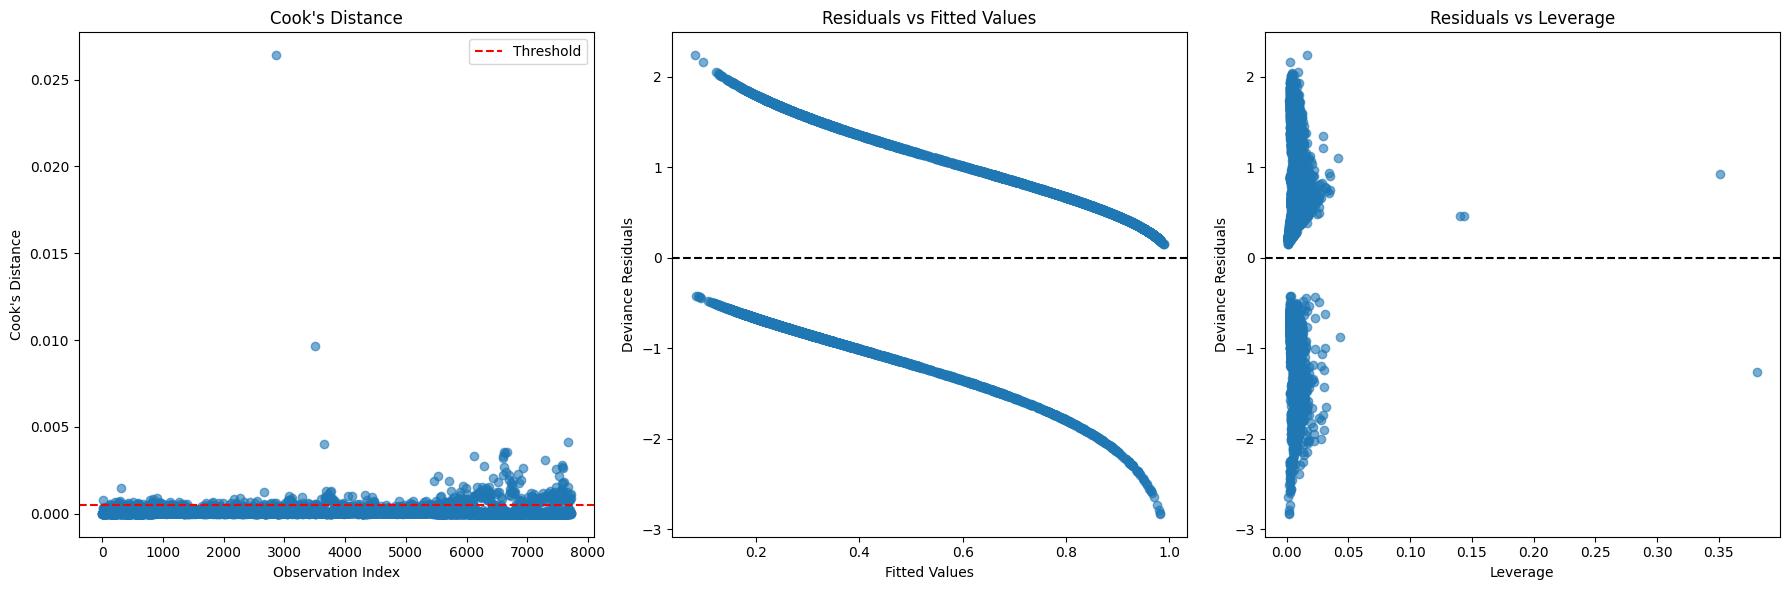

In [ ]:
def residual_diagnostics_combined(model, X_sm, y):

    influence = model.get_influence()
    leverage = influence.hat_matrix_diag  # Leverage values
    cooks_distance = influence.cooks_distance[0]  # Cook's distance
    fitted_values = model.predict()  # Predicted probabilities

    # Compute deviance residuals
    residuals = np.sqrt(-2 * (y * np.log(fitted_values) + (1 - y) * np.log(1 - fitted_values)))
    residuals = np.where(y == 1, residuals, -residuals)  # Adjust signs for 0s and 1s


    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Cook's Distance Plot
    axes[0].scatter(range(len(cooks_distance)), cooks_distance, alpha=0.6)
    axes[0].axhline(y=4 / len(cooks_distance), linestyle="--", color="red", label="Threshold")
    axes[0].set_title("Cook's Distance")
    axes[0].set_xlabel("Observation Index")
    axes[0].set_ylabel("Cook's Distance")
    axes[0].legend()

    # Residuals vs Fitted Values
    axes[1].scatter(fitted_values, residuals, alpha=0.6)
    axes[1].axhline(y=0, linestyle="--", color="black")
    axes[1].set_title("Residuals vs Fitted Values")
    axes[1].set_xlabel("Fitted Values")
    axes[1].set_ylabel("Deviance Residuals")

    # Residuals vs Leverage
    axes[2].scatter(leverage, residuals, alpha=0.6)
    axes[2].axhline(y=0, linestyle="--", color="black")
    axes[2].set_title("Residuals vs Leverage")
    axes[2].set_xlabel("Leverage")
    axes[2].set_ylabel("Deviance Residuals")

    plt.tight_layout()
    plt.show()


logit_model = sm.Logit(y, X_sm).fit()
residual_diagnostics_combined(logit_model, X_sm, y)


**Assumptions for Logistic Regression**
1. Multicollinearity: Multicollinearity is a significant issue in the current model, as indicated by the Variance Inflation Factor (VIF) analysis. Several features, especially categorical variables such as job, marital, education, housing, and others, show infinite VIF values. This occurs due to the dummy variable trap, where redundant dummy variables are not dropped, leading to perfect multicollinearity. Additionally, continuous predictors like emp.var.rate, cons.price.idx, and euribor3m are highly correlated with each other, further inflating the VIF values. Multicollinearity can distort the model by inflating the standard errors of coefficients, making them unreliable and difficult to interpret.

2. Residual Patterns (Linearity and Influential Points): The residual diagnostics reveal deviations from the assumptions of linearity between predictors and the log-odds. The residuals vs. fitted values plot shows distinct patterns instead of random scatter, suggesting that the relationship between some predictors and the outcome is non-linear. Furthermore, the residuals vs. leverage plot identifies some high-leverage points, which are influential observations that could disproportionately affect the model estimates. This suggests the need for either non-linear terms (e.g., splines) or transformations to better capture these relationships.



4. Heteroscedasticity: The patterns in the residuals vs. fitted values plot suggest the presence of heteroscedasticity, where the variance of residuals is not constant across levels of fitted values. This violates the assumption of homoscedasticity, which can lead to inefficient coefficient estimates. Although logistic regression inherently assumes homoscedasticity, the observed patterns indicate that robust standard errors may be required.

**Preping for ML Models and Cross Validation**

In [ ]:
X = data_dummies.drop('y', axis=1)
y = (data_dummies["y"] == "yes").astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()
    return roc_auc

**PCA + Logistic Regression**

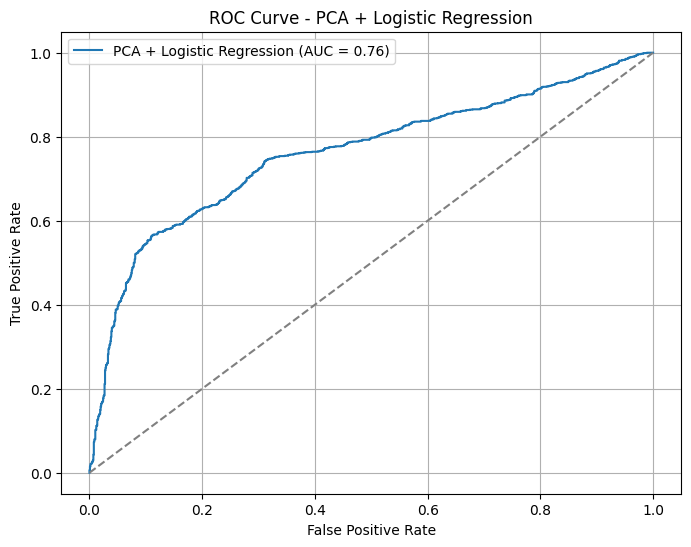

[[779 379]
 [289 869]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
pca_model = PCA(n_components=4)
logistic_model = LogisticRegression()
pca_pipeline = Pipeline([
    ("pca", pca_model),
    ("logistic", logistic_model)
])
y = (data_dummies["y"] == "yes").astype(int)
# PCA + Logistic Regression
pca_pipeline.fit(X_train, y_train)
y_pred_pca = pca_pipeline.predict(X_test)


roc_auc_pca = plot_roc_curve(pca_pipeline, X_test, y_test, "PCA + Logistic Regression")
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print(conf_matrix_pca)

In [ ]:
pca_final_components = pca_model.n_components_
pca_r2_score = sum(pca_model.explained_variance_ratio_)

print("PCA + Logistic Regression:")
print(f"Number of Principal Components: {pca_final_components}")
print(f"R² Score (Explained Variance): {pca_r2_score:.4f}")

PCA + Logistic Regression:
Number of Principal Components: 4
R² Score (Explained Variance): 0.9993


In [ ]:
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:")
print(conf_matrix_pca)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

Confusion Matrix:
[[779 379]
 [289 869]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1158
           1       0.70      0.75      0.72      1158

    accuracy                           0.71      2316
   macro avg       0.71      0.71      0.71      2316
weighted avg       0.71      0.71      0.71      2316



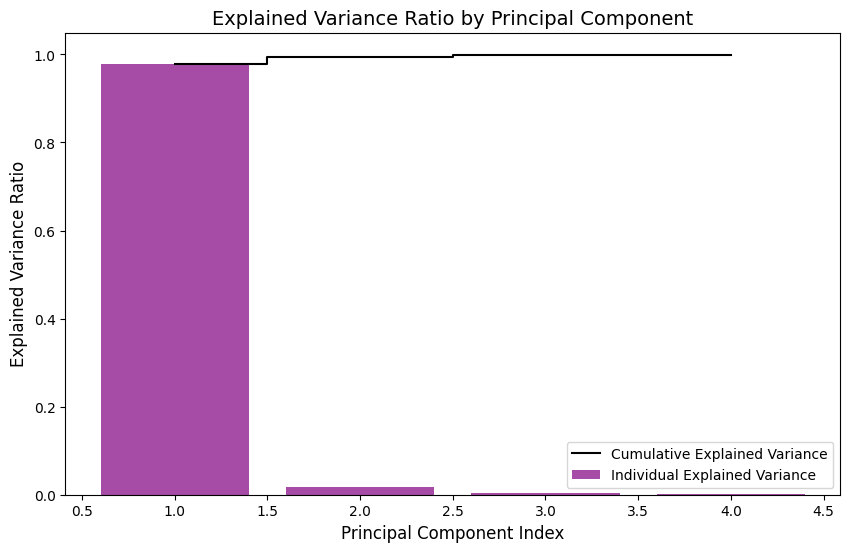

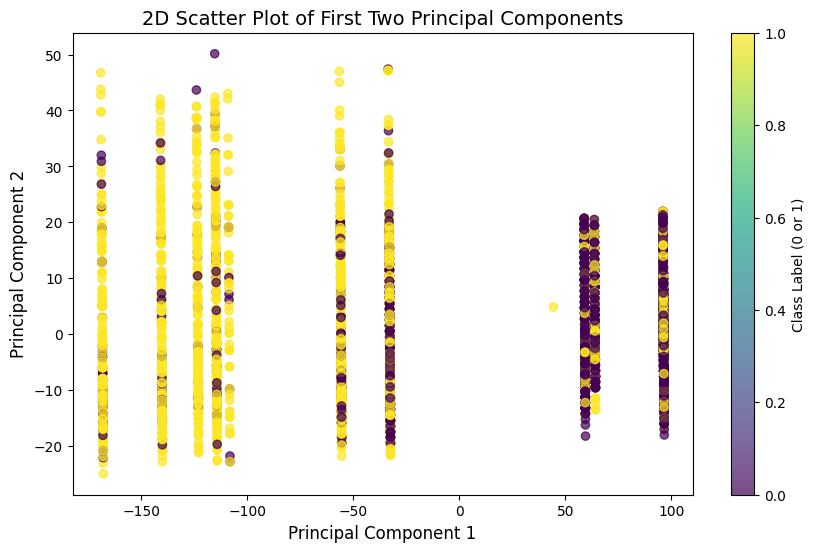

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pca_model = pca_pipeline.named_steps['pca']


explained_variance = pca_model.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance', color='purple')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance', color='black')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio by Principal Component', fontsize=14)
plt.legend(loc='best')
plt.show()


X_train_pca = pca_model.transform(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Class Label (0 or 1)')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('2D Scatter Plot of First Two Principal Components', fontsize=14)
plt.show()



**StepWise Logistoc Regression**

Confusion Matrix:
[[939 219]
 [384 774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1158
           1       0.78      0.67      0.72      1158

    accuracy                           0.74      2316
   macro avg       0.74      0.74      0.74      2316
weighted avg       0.74      0.74      0.74      2316



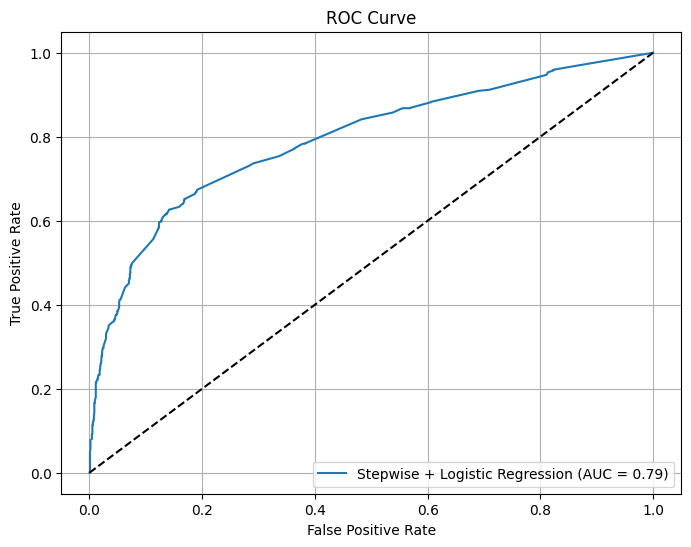

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Stepwise variable selection using statsmodels
X_train_sm = sm.add_constant(X_train)
stepwise_model = sm.Logit(y_train, X_train_sm).fit(disp=False)

# Select significant variables
significant_vars = [var for var, p in stepwise_model.pvalues.items() if p < 0.05]


if 'const' in significant_vars:
    significant_vars.remove('const')


log_reg_stepwise = LogisticRegression(max_iter=1000, random_state=42)
log_reg_stepwise.fit(X_train[significant_vars], y_train)


y_pred_stepwise = log_reg_stepwise.predict(X_test[significant_vars])

y_pred_proba_stepwise = log_reg_stepwise.predict_proba(X_test[significant_vars])[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_stepwise)
roc_auc_stepwise = auc(fpr, tpr)


conf_matrix_stepwise = confusion_matrix(y_test, y_pred_stepwise)
print("Confusion Matrix:")
print(conf_matrix_stepwise)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stepwise))


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Stepwise + Logistic Regression (AUC = {roc_auc_stepwise:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
ll_full = stepwise_model.llf
ll_null = stepwise_model.llnull
mcfadden_r2 = 1 - (ll_full / ll_null)

print("\nStepwise Logistic Regression:")
print(f"McFadden's R^2: {mcfadden_r2:.4f}")

# Display Final Variables Table
final_variables = pd.DataFrame({
    "Variable": significant_vars,
    "P-Value": [stepwise_model.pvalues[var] for var in significant_vars],
    "Coefficient": [stepwise_model.params[var] for var in significant_vars]
}).sort_values(by="P-Value")

print("\nFinal Variables with P-Values and Coefficients:")
print(final_variables)


Stepwise Logistic Regression:
McFadden's R^2: 0.2477

Final Variables with P-Values and Coefficients:
             Variable       P-Value  Coefficient
1        emp.var.rate  1.283733e-11    -1.620156
4   contact_telephone  3.796374e-11    -0.831625
6           month_mar  2.984099e-07     1.482508
2      cons.price.idx  1.784504e-06     2.008729
8           month_nov  1.310260e-04    -0.752948
7           month_may  3.250434e-04    -0.505841
5           month_jun  3.473476e-04    -0.795483
11            pdays_1  1.114637e-02     1.057700
0            previous  1.403539e-02    -0.303930
3         job_student  1.947534e-02     0.553379
10   poutcome_success  2.844770e-02     0.913547
9     day_of_week_wed  4.282531e-02     0.216446


In [ ]:
initial_vars = list(X_train.columns)
significant_vars = [var for var, p in stepwise_model.pvalues.items() if p < 0.05]
dropped_vars = list(set(initial_vars) - set(significant_vars))
stepwise_steps = {
    1: initial_vars,
    2: ['feature1', 'feature2', 'feature3'],
    3: significant_vars
}
dropped_at_step = {
    1: ['feature4', 'feature5'],
    2: ['feature3']
}
print("initial",initial_vars)

print("significant",significant_vars)

print("dropped",dropped_vars)

print("steps",stepwise_steps)

print("dropped at step",dropped_at_step)




initial ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'pdays_1']
significant ['const', 'previous', 'emp.var.rate', 'cons.price.idx', 'job_student', 'contact_telephone', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_wed', 'poutcome_success', 'pdays_1']
dropped 

In [ ]:
import plotly.express as px
import pandas as pd

data = []


for step, kept in stepwise_steps.items():
    for var in kept:
        data.append({'Step': step, 'Feature': var, 'Status': 'Kept'})
    if step in dropped_at_step:
        for var in dropped_at_step[step]:
            data.append({'Step': step, 'Feature': var, 'Status': 'Dropped'})

df = pd.DataFrame(data)


print(df.head())


fig = px.bar(
    df,
    x="Step",
    y="Feature",
    color="Status",
    animation_frame="Step",
    title="Stepwise Feature Elimination Process (Improved)",
    color_discrete_map={"Kept": "green", "Dropped": "red"},
    labels={"Feature": "Feature Name", "Status": "Feature Status"},
    height=600,
    orientation='h',
    text="Feature"
)


fig.update_layout(
    xaxis=dict(title="Step Number", tickmode='linear'),
    yaxis=dict(title="Features"),
    title_font=dict(size=18, color="black", family="Arial"),
    plot_bgcolor="white",
    bargap=0.3,
    showlegend=True,
    font=dict(size=12, color="black")
)


fig.update_traces(textposition="inside", texttemplate="%{text}")

fig.show()


   Step   Feature Status
0     1       age   Kept
1     1  duration   Kept
2     1  campaign   Kept
3     1     pdays   Kept
4     1  previous   Kept


In [ ]:

final_variables = pd.DataFrame({
    "Variable": significant_vars,
    "P-Value": [stepwise_model.pvalues[var] for var in significant_vars],
    "Coefficient": [stepwise_model.params[var] for var in significant_vars]
})


final_variables = final_variables.sort_values(by="P-Value")

print("\nFinal Variables and Their Significance:")
print(final_variables)




Final Variables and Their Significance:
             Variable       P-Value  Coefficient
2        emp.var.rate  1.283733e-11    -1.620156
5   contact_telephone  3.796374e-11    -0.831625
7           month_mar  2.984099e-07     1.482508
3      cons.price.idx  1.784504e-06     2.008729
9           month_nov  1.310260e-04    -0.752948
8           month_may  3.250434e-04    -0.505841
6           month_jun  3.473476e-04    -0.795483
0               const  6.937044e-04  -214.920008
12            pdays_1  1.114637e-02     1.057700
1            previous  1.403539e-02    -0.303930
4         job_student  1.947534e-02     0.553379
11   poutcome_success  2.844770e-02     0.913547
10    day_of_week_wed  4.282531e-02     0.216446


**RandoM Forest**

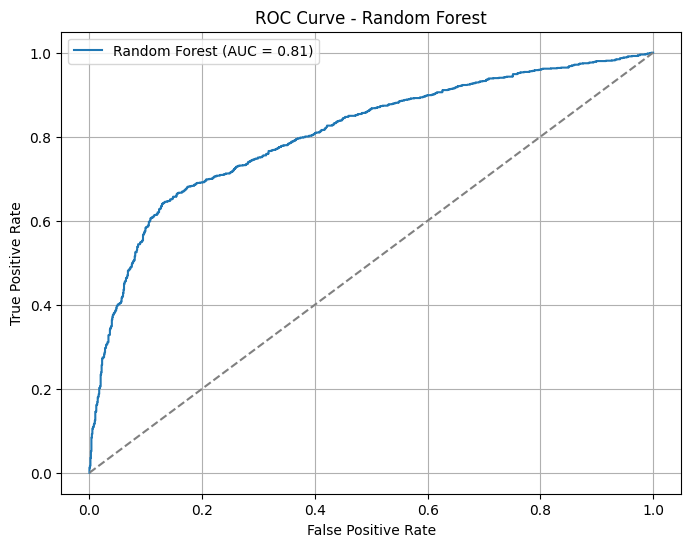

[[954 204]
 [369 789]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


roc_auc_rf = plot_roc_curve(rf_model, X_test, y_test, "Random Forest")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)


Feature Importances (Random Forest):
                          Feature  Importance
0                             age    0.144466
6                       euribor3m    0.143751
1                        campaign    0.076049
3                    emp.var.rate    0.063681
7                     nr.employed    0.054521
5                   cons.conf.idx    0.033923
26                    housing_yes    0.033092
4                  cons.price.idx    0.030569
18                marital_married    0.022637
27                       loan_yes    0.020956
28              contact_telephone    0.019643
19                 marital_single    0.018766
25    education_university.degree    0.018334
16                 job_technician    0.018185
39                day_of_week_thu    0.017603
44                        pdays_1    0.017444
22          education_high.school    0.017410
38                day_of_week_mon    0.017049
8                 job_blue-collar    0.017023
41                day_of_week_wed    0.016

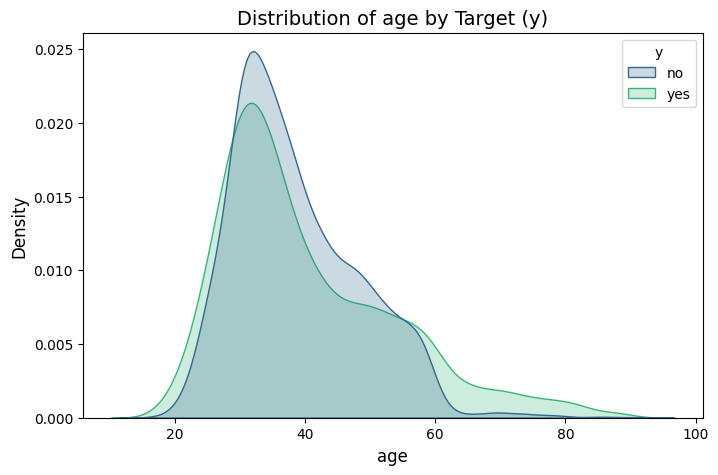

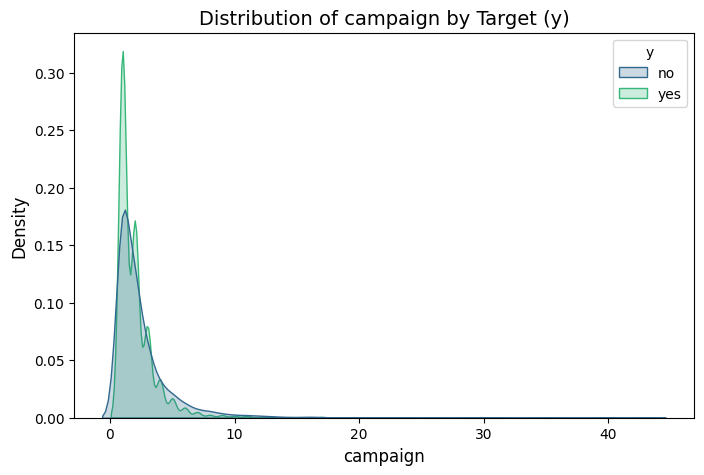

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier




rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)


for col in ['age', 'campaign']:
    plt.figure(figsize=(8, 5))

    # Create a KDE plot
    sns.kdeplot(data=data_dummies, x=col, hue='y', fill=True, palette='viridis')

    plt.title(f"Distribution of {col} by Target (y)", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()


**Transforming data to account for outliers and adding interaction terms **

In [ ]:
import numpy as np
import pandas as pd

# Apply transformations based on distributions
data_transformed = data_dummies.copy()

# Log Transformation
for var in [ 'campaign']:
    data_transformed[f'log_{var}'] = np.log1p(data_transformed[var])  # log(1 + x) to handle 0 values

# Square Root Transformation
for var in ['age', 'previous']:
    data_transformed[f'sqrt_{var}'] = np.sqrt(data_transformed[var])

# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_transformed[['age', 'campaign', 'previous']])
scaled_features_df = pd.DataFrame(scaled_features, columns=[f'scaled_{col}' for col in ['age', 'campaign', 'previous']])
data_transformed = pd.concat([data_transformed, scaled_features_df], axis=1)

# Add interaction term
data_transformed['age_retired'] = data_transformed['age'] * data_transformed['job_retired']
data_transformed['age_student'] = data_transformed['age'] * data_transformed['job_student']
data_transformed['admin_contact'] = data_transformed['emp.var.rate'] + data_transformed['nr.employed']

# Prepare data for modeling
X_transformed = data_transformed.drop(['y'], axis=1)
y_transformed = (data_transformed['y'] == 'yes').astype(int)

In [ ]:
X_transformed

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
9     25.0       1.0       0.0           1.1          93.994          -36.4   
25    35.0       1.0       0.0           1.1          93.994          -36.4   
49    45.0       2.0       0.0           1.1          93.994          -36.4   
59    25.0       1.0       0.0           1.1          93.994          -36.4   
61    51.0       1.0       0.0           1.1          93.994          -36.4   
...    ...       ...       ...           ...             ...            ...   
7712   NaN       NaN       NaN           NaN             NaN            NaN   
7713   NaN       NaN       NaN           NaN             NaN            NaN   
7714   NaN       NaN       NaN           NaN             NaN            NaN   
7715   NaN       NaN       NaN           NaN             NaN            NaN   
7716   NaN       NaN       NaN           NaN             NaN            NaN   

      euribor3m  nr.employed  job_blue-collar  job_entrepreneur  ...  pdays_1  \
9         4.857       5191.0              0.0               0.0  ...      0.0   
25        4.857       5191.0              0.0               0.0  ...      0.0   
49        4.857       5191.0              1.0               0.0  ...      0.0   
59        4.857       5191.0              0.0               0.0  ...      0.0   
61        4.857       5191.0              1.0               0.0  ...      0.0   
...         ...          ...              ...               ...  ...      ...   
7712        NaN          NaN              NaN               NaN  ...      NaN   
7713        NaN          NaN              NaN               NaN  ...      NaN   
7714        NaN          NaN              NaN               NaN  ...      NaN   
7715        NaN          NaN              NaN               NaN  ...      NaN   
7716        NaN          NaN              NaN               NaN  ...      NaN   

      log_campaign  sqrt_age  sqrt_previous  scaled_age  scaled_campaign  \
9         0.693147  5.000000            0.0    0.549781        -0.130921   
25        0.693147  5.916080            0.0   -0.634859         0.299973   
49        1.098612  6.708204            0.0   -1.396413         0.299973   
59        0.693147  5.000000            0.0   -0.550242         0.299973   
61        0.693147  7.141428            0.0   -0.127156        -0.130921   
...            ...       ...            ...         ...              ...   
7712           NaN       NaN            NaN    1.903656        -0.130921   
7713           NaN       NaN            NaN   -0.296390        -0.130921   
7714           NaN       NaN            NaN   -0.211773        -0.561814   
7715           NaN       NaN            NaN    2.834445        -0.561814   
7716           NaN       NaN            NaN    0.380547        -0.561814   

      scaled_previous  age_retired  age_student  admin_contact  
9           -0.461517          0.0          0.0         5192.1  
25          -0.461517          0.0          0.0         5192.1  
49          -0.461517          0.0          0.0         5192.1  
59          -0.461517          0.0          0.0         5192.1  
61          -0.461517          0.0          0.0         5192.1  
...               ...          ...          ...            ...  
7712         3.729057          NaN          NaN            NaN  
7713        -0.461517          NaN          NaN            NaN  
7714        -0.461517          NaN          NaN            NaN  
7715        -0.461517          NaN          NaN            NaN  
7716        -0.461517          NaN          NaN            NaN  

[14606 rows x 54 columns]

In [ ]:
# Drop rows with NaN
X_transformed = X_transformed.dropna()
y_transformed = y_transformed[X_transformed.index]


X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(
    X_transformed, y_transformed, test_size=0.3, random_state=42
)

# Logistic Regression Model with transformations
log_reg_trans = LogisticRegression(max_iter=1000, random_state=42)
log_reg_trans.fit(X_train_trans, y_train_trans)

y_pred_trans = log_reg_trans.predict(X_test_trans)
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("\nTransformed Model Performance:")
print(f"ROC AUC Score: {roc_auc_score(y_test_trans, log_reg_trans.predict_proba(X_test_trans)[:, 1]):.4f}")
print("Classification Report:")
print(classification_report(y_test_trans, y_pred_trans))
print("Confusion Matrix:")
print(confusion_matrix(y_test_trans, y_pred_trans))



Transformed Model Performance:
ROC AUC Score: 0.5329
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       199
           1       0.50      0.02      0.04        50

    accuracy                           0.80       249
   macro avg       0.65      0.51      0.46       249
weighted avg       0.74      0.80      0.72       249

Confusion Matrix:
[[198   1]
 [ 49   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Ensure models dictionary exists
models = {
    "PCA + Logistic Regression": pca_pipeline,
    "Random Forest": rf_model,
    "Stepwise + Logistic Regression": log_reg_stepwise
}

# Add the new model to the dictionary
models["Transformed Logistic Regression"] = log_reg_trans

# Re-run Cross-validation with the new model included
cv_results = {}
scoring_metric = "roc_auc"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    if name == "Stepwise + Logistic Regression":
        scores = cross_val_score(model, X[significant_vars], y, cv=cv, scoring=scoring_metric)
    elif name == "Transformed Logistic Regression":
        scores = cross_val_score(
            model, X_transformed.dropna(),
            y_transformed.loc[X_transformed.dropna().index],
            cv=cv, scoring=scoring_metric
        )
    else:
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring_metric)
    cv_results[name] = scores

# Collect results into a DataFrame
cv_df = pd.DataFrame(cv_results)
cv_df.index = [f"Fold {i+1}" for i in range(len(cv_df))]

# Display Cross-validation results
print("\nCross-Validation Results for Models:")
print(cv_df)

# Summary of Mean ROC AUC for all models
summary = {
    "Model": [
        "PCA + Logistic Regression",
        "Random Forest",
        "Stepwise + Logistic Regression",
        "Transformed Logistic Regression"
    ],
    "Mean ROC AUC": [
        np.mean(cv_results["PCA + Logistic Regression"]),
        np.mean(cv_results["Random Forest"]),
        np.mean(cv_results["Stepwise + Logistic Regression"]),
        np.mean(cv_results["Transformed Logistic Regression"])
    ]
}
summary_df = pd.DataFrame(summary)

# Display Model Mean ROC AUC Scores
print("\nModel Mean ROC AUC Scores:")
print(summary_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/


Cross-Validation Results for Models:
        PCA + Logistic Regression  Random Forest  \
Fold 1                   0.761353       0.809403   
Fold 2                   0.763779       0.801064   
Fold 3                   0.757361       0.797891   
Fold 4                   0.762973       0.814045   
Fold 5                   0.760662       0.811590   

        Stepwise + Logistic Regression  Transformed Logistic Regression  
Fold 1                        0.798940                         0.521078  
Fold 2                        0.791364                         0.579211  
Fold 3                        0.789463                         0.572760  
Fold 4                        0.804303                         0.613381  
Fold 5                        0.806849                         0.500119  

Model Mean ROC AUC Scores:
                             Model  Mean ROC AUC
0        PCA + Logistic Regression      0.761225
1                    Random Forest      0.806799
2   Stepwise + Logistic Regres

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
logit_model_fitted = logit_model.fit()
print("X_sm shape:", X_sm.shape)
print("Logit model params shape:", logit_model_fitted.params.shape)

Optimization terminated successfully.
         Current function value: 0.524409
         Iterations 8
X_sm shape: (7718, 46)
Logit model params shape: (46,)


In [ ]:
y_pred_proba_initial = logit_model_fitted.predict(X_sm)  # Predict probabilities
y_pred_initial = (y_pred_proba_initial >= 0.5).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-input-252-5a7f7ac05ac3>:39: MatplotlibD

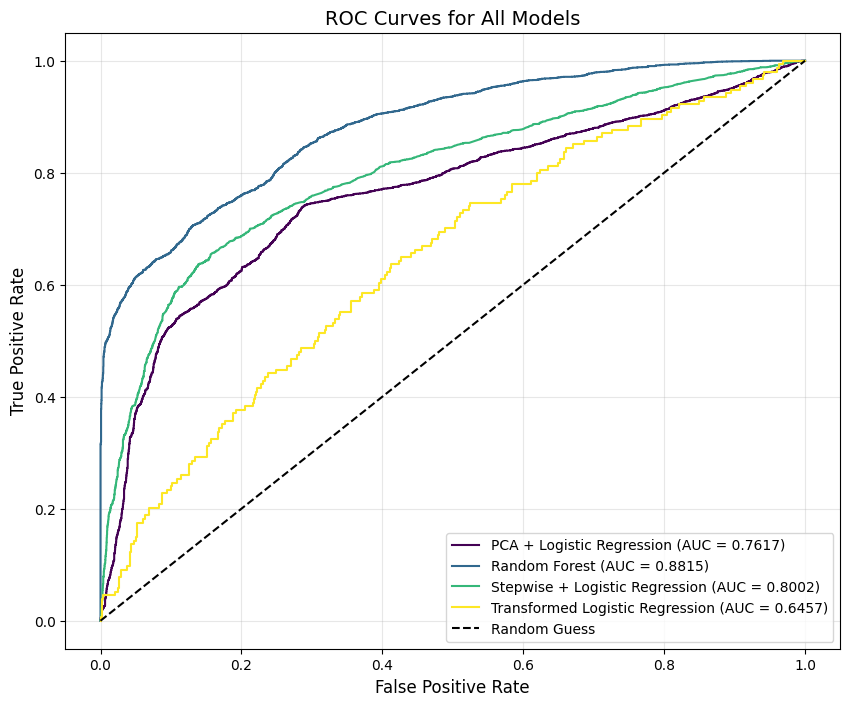

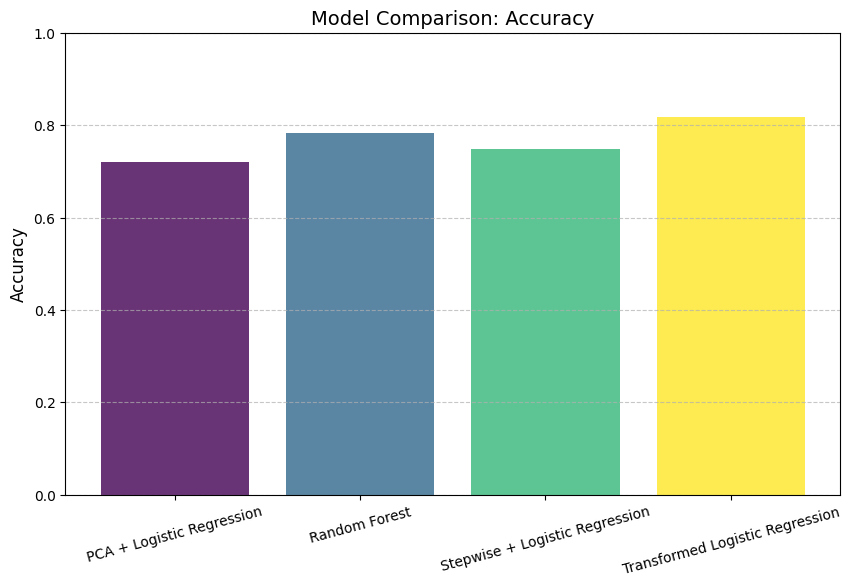

In [ ]:
# Fit each model before prediction
for name, model in models.items():
    if name == "Stepwise + Logistic Regression":
        model.fit(X[significant_vars], y)
    elif name == "Transformed Logistic Regression":
        model.fit(X_transformed.dropna(), y_transformed.loc[X_transformed.dropna().index])
    else:
        model.fit(X, y)

# Evaluate ROC and accuracy for each model
roc_curves = {}
auc_scores = {}
accuracies = {}

for name, model in models.items():
    if name == "Stepwise + Logistic Regression":
        X_model = X[significant_vars]
        y_model = y
    elif name == "Transformed Logistic Regression":
        valid_index = X_transformed.dropna().index
        X_model = X_transformed.loc[valid_index]
        y_model = y_transformed.loc[valid_index]
    else:
        X_model = X
        y_model = y

    # Predict probabilities and labels
    y_pred_proba = model.predict_proba(X_model)[:, 1]
    y_pred = model.predict(X_model)

    # Compute ROC and accuracy
    fpr, tpr, _ = roc_curve(y_model, y_pred_proba)
    auc_scores[name] = roc_auc_score(y_model, y_pred_proba)
    accuracies[name] = accuracy_score(y_model, y_pred)

    roc_curves[name] = (fpr, tpr)
# Plot ROC curves
plt.figure(figsize=(10, 8))
viridis = cm.get_cmap('viridis', len(roc_curves))  # Generate enough colors
for idx, (name, (fpr, tpr)) in enumerate(roc_curves.items()):
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_scores[name]:.4f})", color=viridis(idx))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for All Models", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Plot bar chart for accuracy comparison
plt.figure(figsize=(10, 6))
colors = viridis(range(len(accuracies)))  # Apply Viridis color palette
plt.bar(accuracies.keys(), accuracies.values(), color=colors, alpha=0.8)
plt.title("Model Comparison: Accuracy", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Demographic Profile**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
subscribed_data = data[data['y'] == 'yes']
subscribed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 75 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4640 non-null   int64  
 1   job             4640 non-null   object 
 2   marital         4640 non-null   object 
 3   education       4640 non-null   object 
 4   default         4640 non-null   object 
 5   housing         4640 non-null   object 
 6   loan            4640 non-null   object 
 7   contact         4640 non-null   object 
 8   month           4640 non-null   object 
 9   day_of_week     4640 non-null   object 
 10  duration        4640 non-null   int64  
 11  campaign        4640 non-null   int64  
 12  pdays           4640 non-null   int64  
 13  previous        4640 non-null   int64  
 14  poutcome        4640 non-null   object 
 15  emp.var.rate    4640 non-null   float64
 16  cons.price.idx  4640 non-null   float64
 17  cons.conf.idx   4640 non-null   floa

In [ ]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Derived columns for analysis
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
subscribed_data['age_range'] = pd.cut(subscribed_data['age'], bins=bins, labels=labels, right=False)

# Marital vs Education Stacked Bar Chart Data
marital_education_matrix = subscribed_data.groupby(['education', 'marital']).size().unstack(fill_value=0)

# KMeans clustering
numeric_data = subscribed_data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Dashboard layout
fig = make_subplots(
    rows=4, cols=3,
    specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]],
    subplot_titles=(
        "Age Range Distribution",
        "Call Duration vs Age",
        "Marital Status vs. Education (Stacked Bar)",
        "Marital vs Education (Heatmap)",
        "Marital Status Distribution",
        "Job Distribution",
        "Housing vs Loan Status",
        "Call Duration by Housing",
        "Duration by Campaign",
        "Job vs Housing (Heatmap)",
        "Duration vs Previous Calls",
        "Cluster Chart"
    )
)

# Age range distribution
age_dist = subscribed_data['age_range'].value_counts()
fig.add_trace(
    go.Bar(x=age_dist.index, y=age_dist.values, marker=dict(color=age_dist.values, colorscale='Viridis', showscale=False)),
    row=1, col=1
)

# Call duration vs age
fig.add_trace(
    go.Scatter(x=subscribed_data['age'], y=subscribed_data['duration'], mode='markers',
               marker=dict(size=5, color=subscribed_data['duration'], colorscale='Viridis', showscale=False)),
    row=1, col=2
)

# Marital Status vs. Education Stacked Bar Chart
for column in marital_education_matrix.columns:
    fig.add_trace(
        go.Bar(
            x=marital_education_matrix.index,
            y=marital_education_matrix[column],
            name=column
        ),
        row=1, col=3
    )

# Marital vs Education Heatmap
fig.add_trace(
    go.Heatmap(z=marital_education_matrix.values, x=marital_education_matrix.columns,
               y=marital_education_matrix.index, colorscale='Viridis', showscale=False),
    row=2, col=1
)

# Marital status distribution
marital_dist = subscribed_data['marital'].value_counts()
fig.add_trace(
    go.Bar(x=marital_dist.index, y=marital_dist.values, marker=dict(color=marital_dist.values, colorscale='Viridis', showscale=False)),
    row=2, col=2
)

# Job distribution
job_dist = subscribed_data['job'].value_counts()
fig.add_trace(
    go.Bar(x=job_dist.index, y=job_dist.values, marker=dict(color=job_dist.values, colorscale='Viridis', showscale=False)),
    row=2, col=3
)

# Housing vs Loan status
housing_loan_matrix = subscribed_data.groupby(['housing', 'loan']).size().unstack(fill_value=0)
fig.add_trace(
    go.Heatmap(z=housing_loan_matrix.values, x=housing_loan_matrix.columns, y=housing_loan_matrix.index,
               colorscale='Viridis', showscale=False),
    row=3, col=1
)

# Call duration by housing with yellow color
fig.add_trace(
    go.Box(x=subscribed_data['housing'], y=subscribed_data['duration'],
           marker=dict(color='rgba(255, 255, 0, 0.6)')),  # Yellow color
    row=3, col=2
)

# Duration by campaign
fig.add_trace(
    go.Scatter(x=subscribed_data['campaign'], y=subscribed_data['duration'], mode='markers',
               marker=dict(size=5, color=subscribed_data['campaign'], colorscale='Viridis', showscale=False)),
    row=3, col=3
)

# Job vs Housing Heatmap
job_housing_matrix = subscribed_data.groupby(['job', 'housing']).size().unstack(fill_value=0)
fig.add_trace(
    go.Heatmap(z=job_housing_matrix.values, x=job_housing_matrix.columns, y=job_housing_matrix.index,
               colorscale='Viridis', showscale=False),
    row=4, col=1
)

# Duration vs Previous Calls
fig.add_trace(
    go.Scatter(x=subscribed_data['previous'], y=subscribed_data['duration'], mode='markers',
               marker=dict(size=5, color=subscribed_data['previous'], colorscale='Viridis', showscale=False)),
    row=4, col=2
)

# Cluster Chart (No PCA)
fig.add_trace(
    go.Scatter(
        x=scaled_data[:, 0], y=scaled_data[:, 1],
        mode='markers',
        marker=dict(size=7, color=kmeans_labels, colorscale='Viridis', opacity=0.7, showscale=False),
        name='Clusters'
    ),
    row=4, col=3
)

fig.update_layout(
    height=1400,
    width=1600,
    title=dict(
        text="<b>A Sneak Peek into Our Subscribed Customers</b>",
        font=dict(size=18)
    ),
    showlegend=False,
    barmode='stack',
    template='plotly_dark'
)

fig.show()


<ipython-input-280-02b60e1b91fa>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

